In [14]:
import glob
import sys
import numpy as np
import pandas as pd
import pickle as pk
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA,FastICA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
import pandas as pd

# Genearal analisys

In [3]:
### loadiing entire data-set

# Background

b_name='/home/thiago/Documents/Data_Sets/LPC-anomaly-detection/Input_Background_1.csv'
background = np.genfromtxt(b_name, delimiter=',')
background = background[1:,:]
print(".Background Loaded..." )
print(".Background shape: {}".format(background.shape))

# Signal

s_name='/home/thiago/Documents/Data_Sets/LPC-anomaly-detection/Input_Signal_1.csv'
signal = np.genfromtxt(s_name, delimiter=',')
signal = signal[1:,:]
print(".Signal Loaded...")
print(".Signal shape: {}\n".format(signal.shape))


.Background Loaded...
.Background shape: (543500, 21)
.Signal Loaded...
.Signal shape: (522467, 21)



In [4]:
### normalizing data

data = np.vstack((background,signal))

scaler = MinMaxScaler()

scaler.fit(data)

data = scaler.transform(data)

background = data[:len(background)]

signal = data[len(background):]


In [5]:
### deffining attributes names

attributes = ["px1","py1","pz1","E1","eta1",
                "phi1","pt1","px2","py2","pz2",
                "E2","eta2","phi2","pt2",
                "Delta_R","M12","MET","S","C",
                "HT","A"]


## Orriginal attrributes distribution

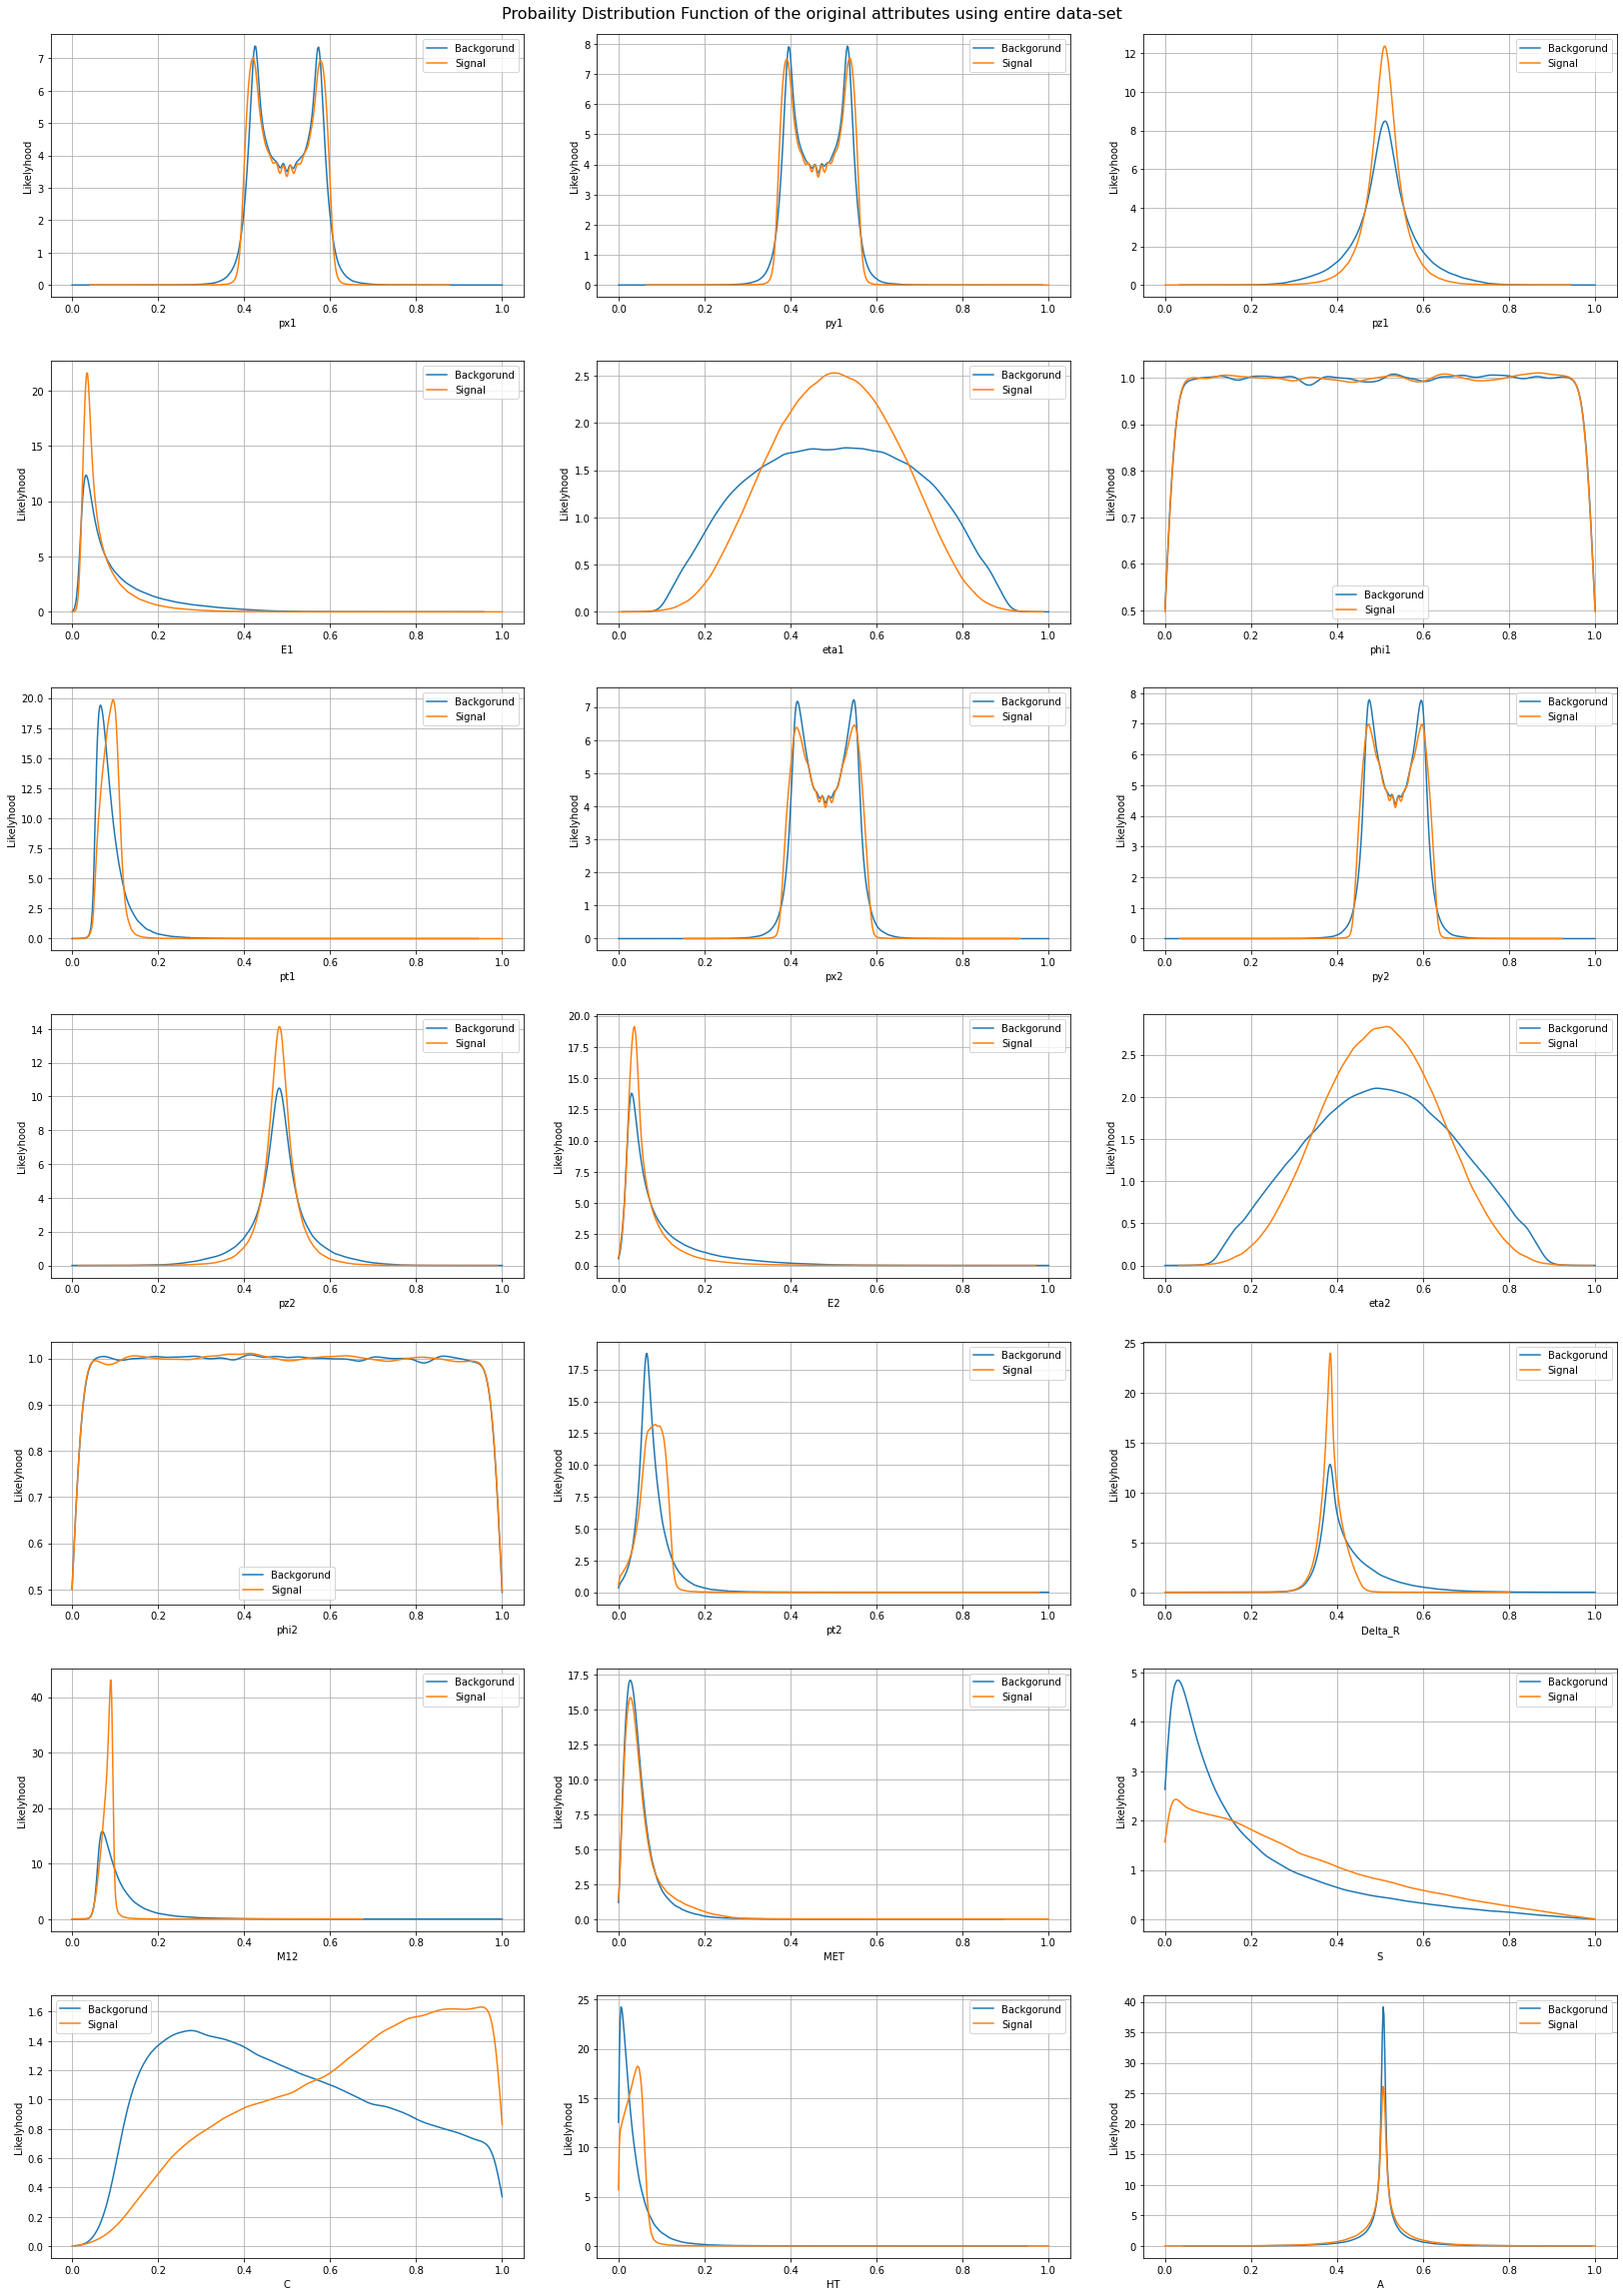

In [49]:
bg_eval_list = []

sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Probaility Distribution Function of the original attributes using entire data-set', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # appending values interval the following analysis

        bg_eval_list.append(bg_eval)

        sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_xlabel(att)
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-PDF-entire-data-set.pdf',format='pdf')

del fig

## Z-score

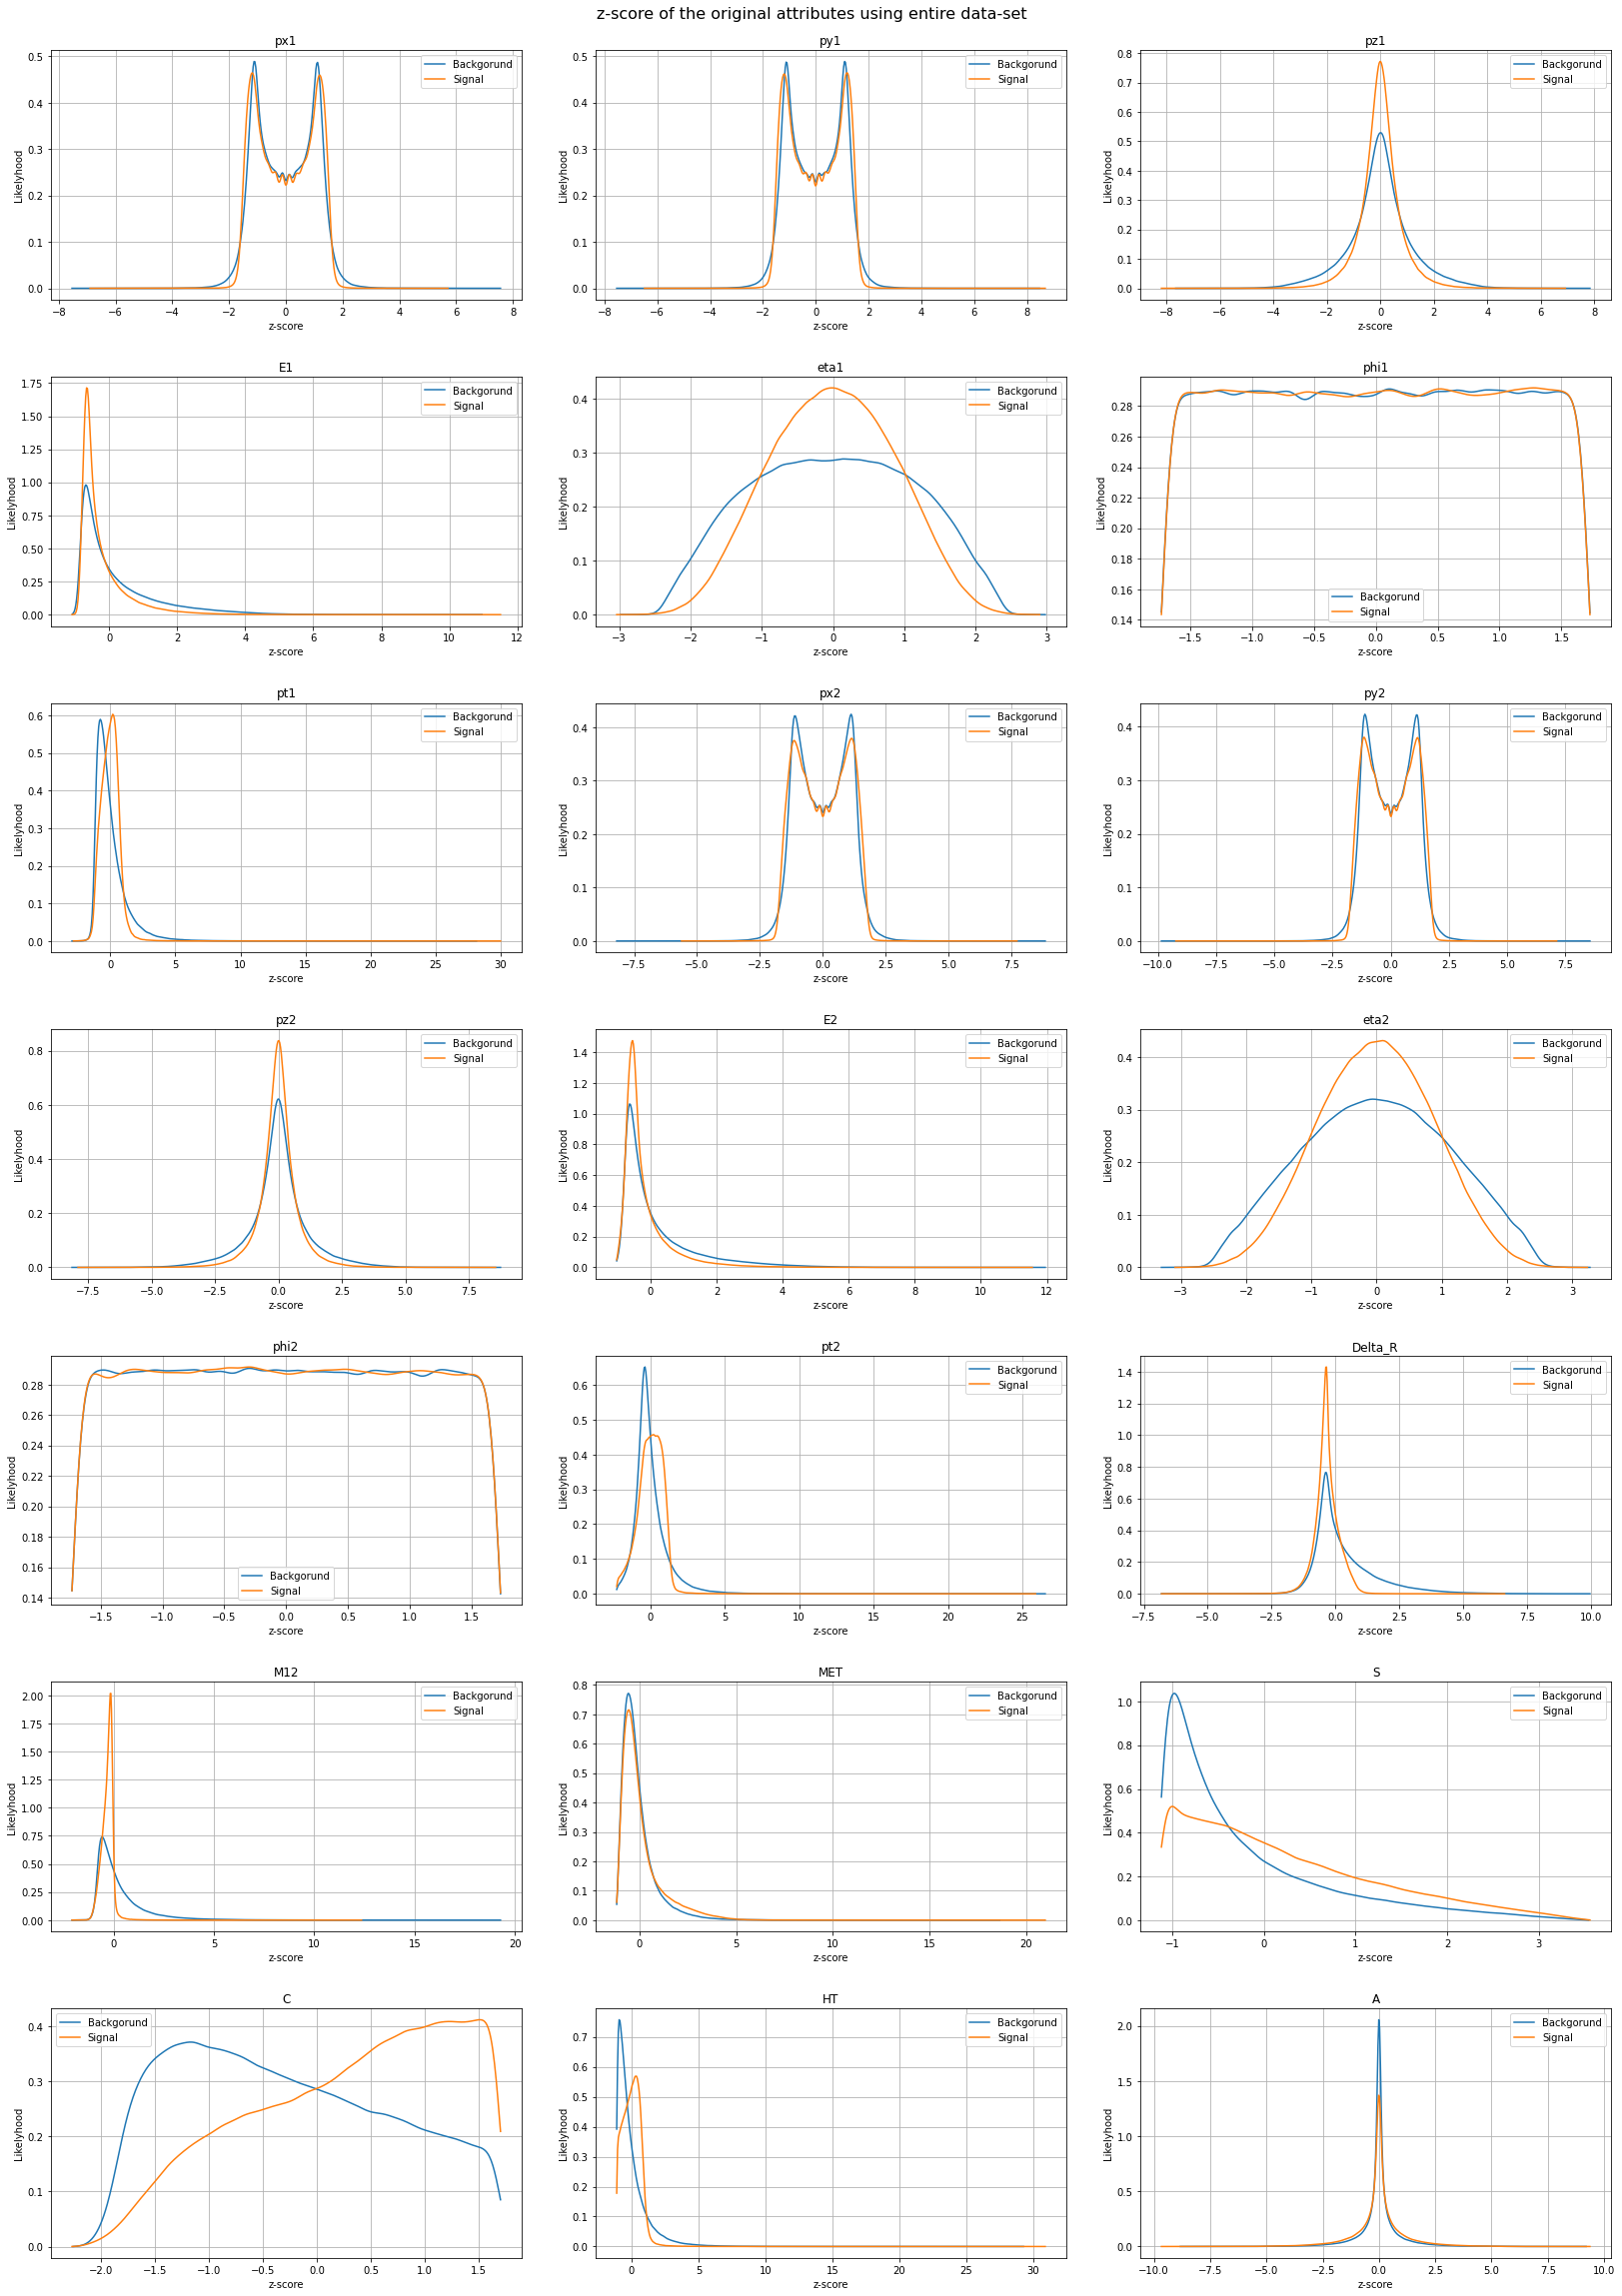

In [50]:
size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('z-score of the original attributes using entire data-set', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # unite background and signal for z-score
        # calculation

        all_data = np.hstack((att_background,att_signal))

        mean = np.mean(all_data)

        std = np.std(all_data)

        # calculation zscore

        bg_zscore = (att_background - mean)/std
        
        sg_zscore = (att_signal - mean)/std

        # computing the zscore distribution

        bg_kernel = stats.gaussian_kde(bg_zscore)

        sg_kernel = stats.gaussian_kde(sg_zscore)

        # defining attributes limits

        bg_max = max(bg_zscore)

        bg_min = min(bg_zscore)

        sg_max = max(sg_zscore)

        sg_min = min(sg_zscore)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title(att)
        ax[line,col].set_xlabel("z-score")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-z-score-entire-data-set.pdf',format='pdf')

del fig

## PCA

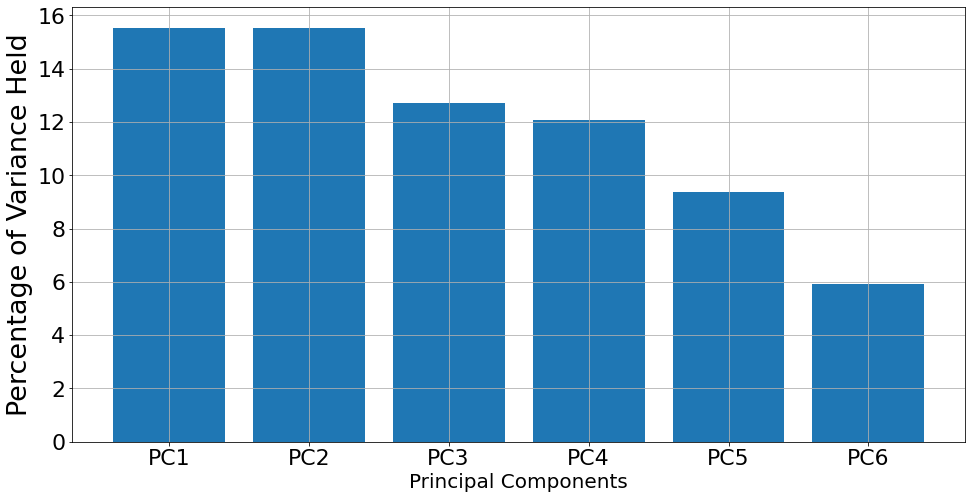

Variation maintained: 71.16
                  


In [51]:
### Calculate PCA variance

N_PCs = 6

# standardizing

scaler = StandardScaler().fit(data)
features_padronizadas = scaler.transform(data)

# fitting model

pca= PCA(n_components = N_PCs)
pca.fit(features_padronizadas)

# maintained variance calculation

variancia_percentual_pca = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)

# Now change to PCA Figures directory

fig = plt.figure(figsize=[16,8])
ax = fig.subplots(1,1)
ax.bar(x=['PC' + str(x) for x in range(1,(N_PCs+1))],height=variancia_percentual_pca[0:N_PCs])

ax.set_ylabel('Percentage of Variance Held',fontsize=27)
ax.set_xlabel('Principal Components',fontsize=20)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
ax.grid()
plt.show()

print('Variation maintained: %.2f' % variancia_percentual_pca.sum())
print('                  ')

In [52]:
### projecting with PCA

proj_data = pca.transform(features_padronizadas)

# separating signal from background

proj_background = proj_data[:len(background)]

proj_signal = proj_data[len(background):]

PCs = ["PC{}".format(int(x+1)) for x in range( N_PCs)]

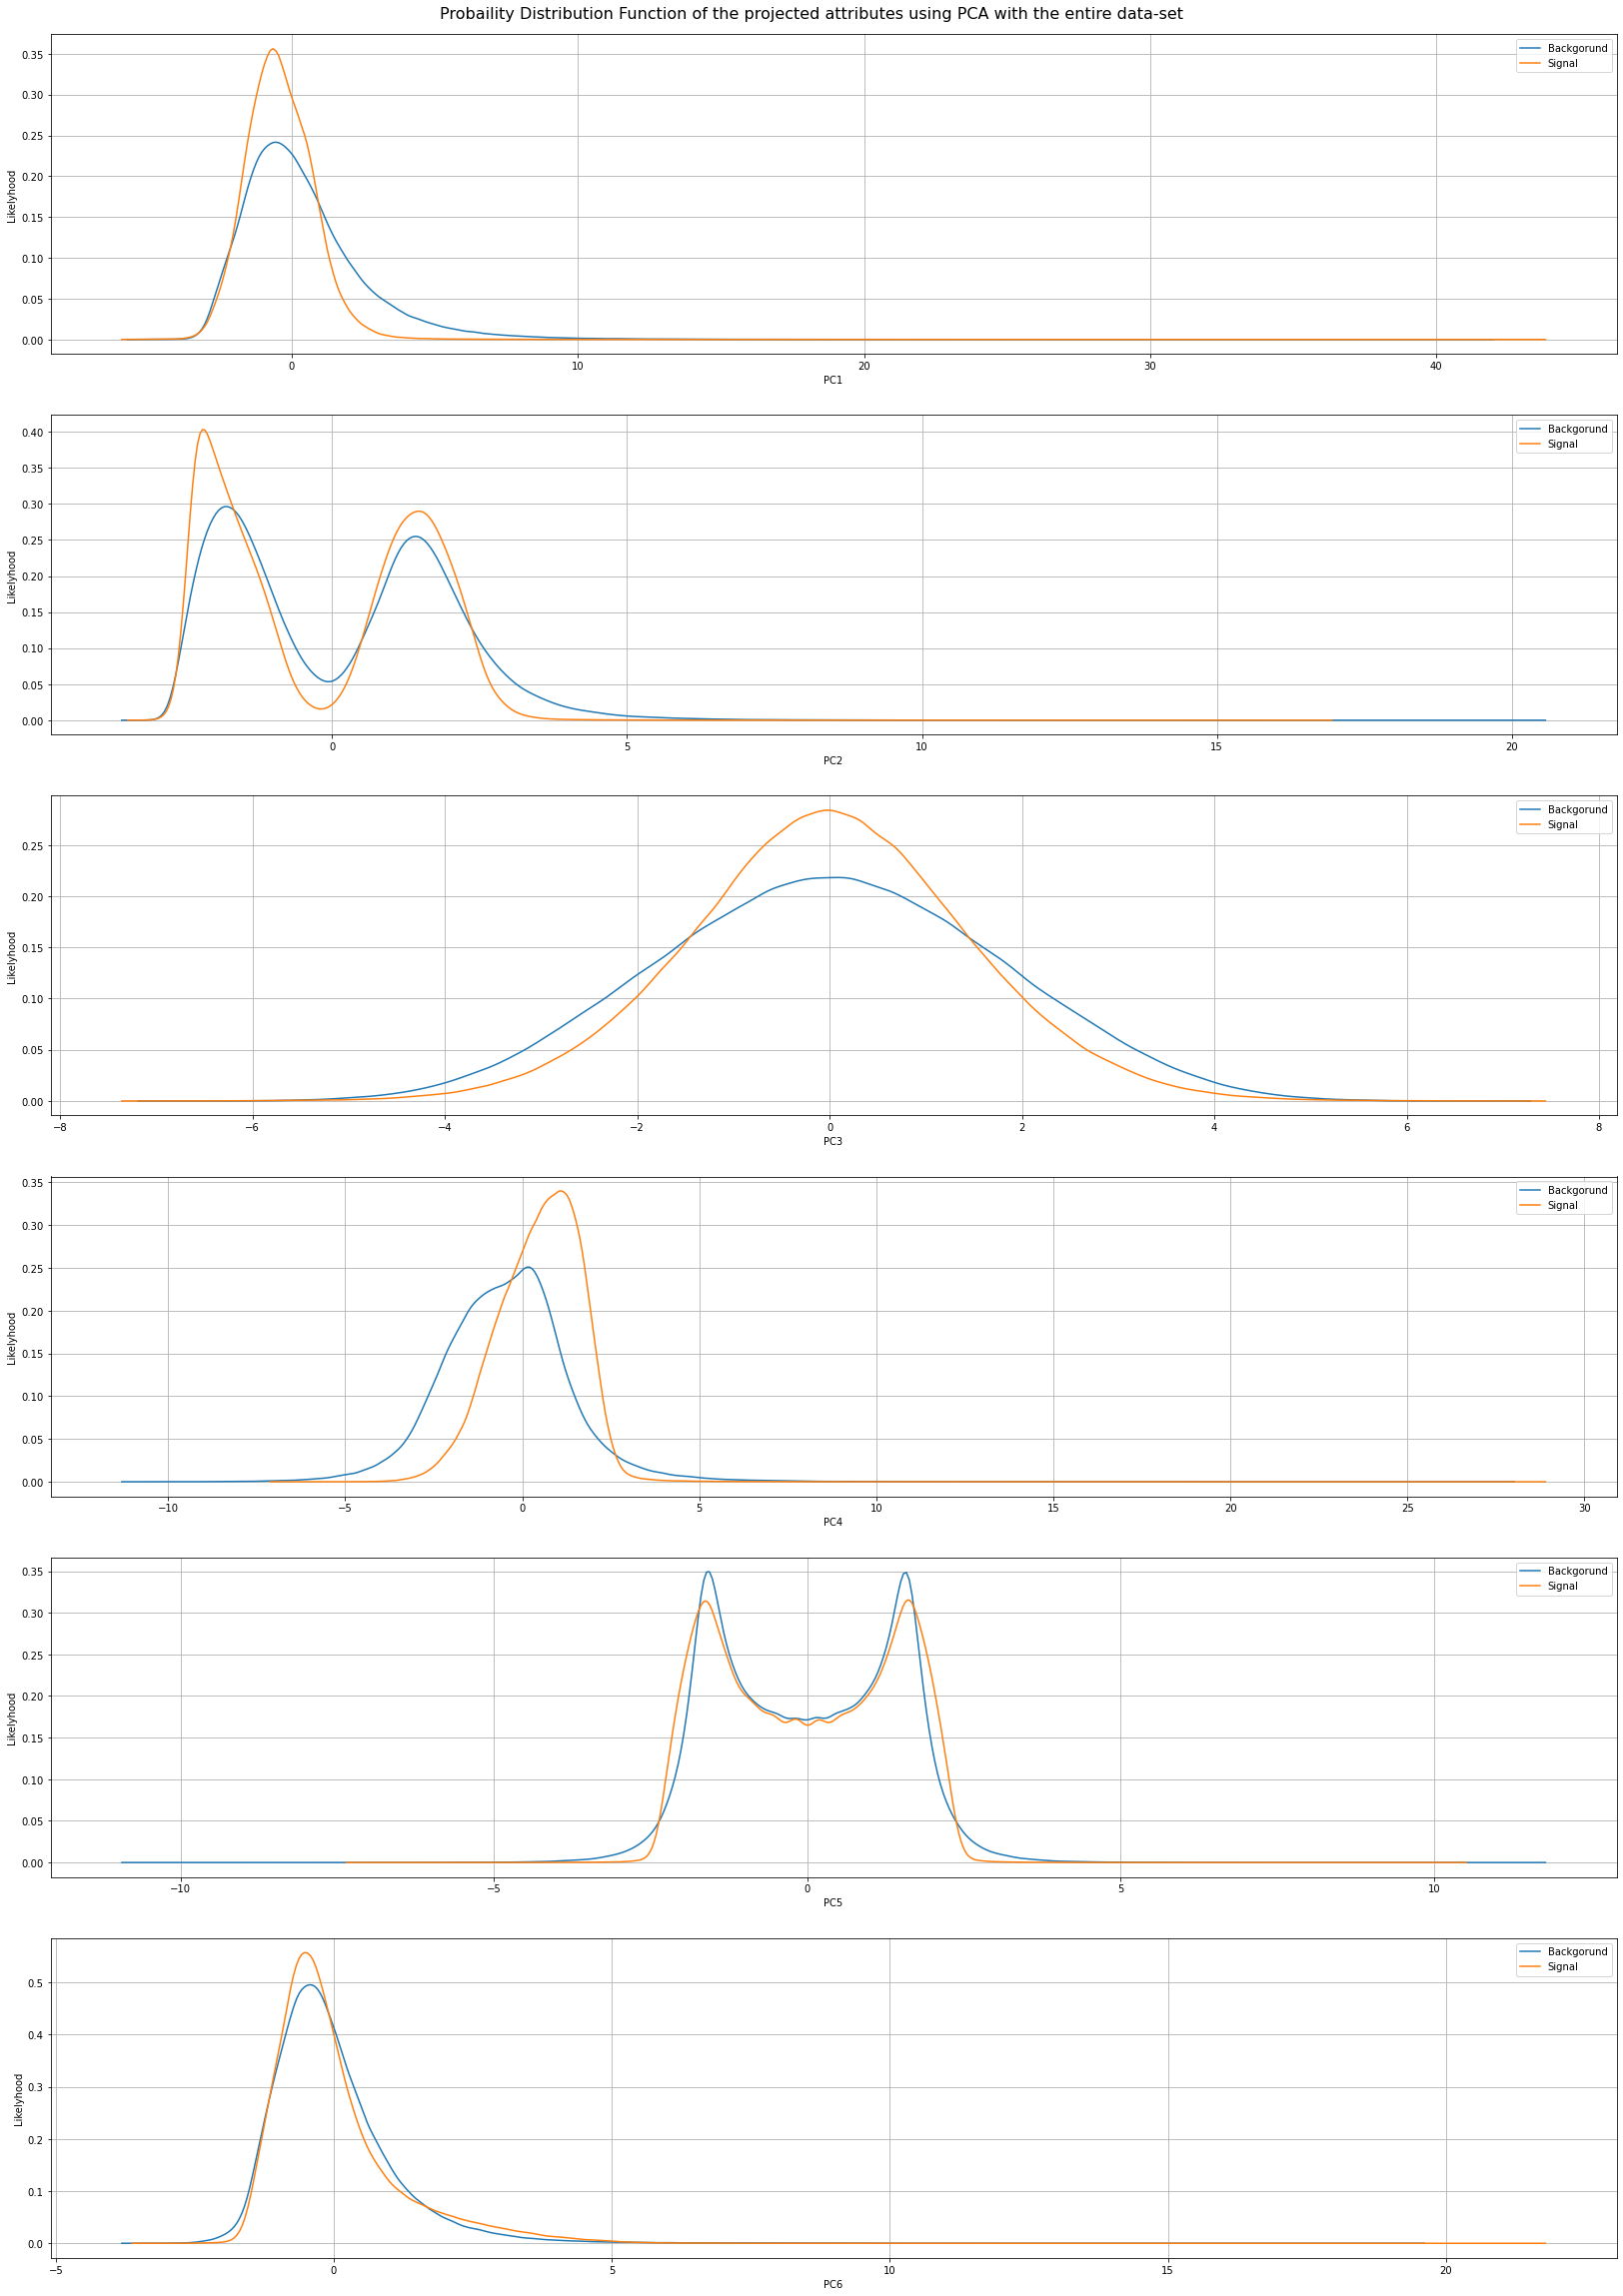

In [53]:
### ploting results

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(6,1)

fig.suptitle("Probaility Distribution Function of the projected attributes using PCA with the entire data-set", fontsize=16)


for i,att in enumerate(PCs):

        # getting attributes values

        att_background = proj_background[:,i]

        att_signal = proj_signal[:,i]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # ploting results

        ax[i].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[i].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[i].legend()
        ax[i].set_xlabel(att)
        ax[i].set_ylabel("Likelyhood")
        ax[i].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/PCA-PDF-entire-data-set.pdf',format='pdf')

del fig

## PCA+ICA

In [54]:
### projecting data with ICA

ica = FastICA( algorithm='parallel',
                whiten=False,
                max_iter=400
            )

ica_data = ica.fit(proj_data).transform(proj_data)

# separating signal from background

ica_background = ica_data[:len(background)]

ica_signal = ica_data[len(background):]

Cs = ["C{}".format(int(x+1)) for x in range( N_PCs)]

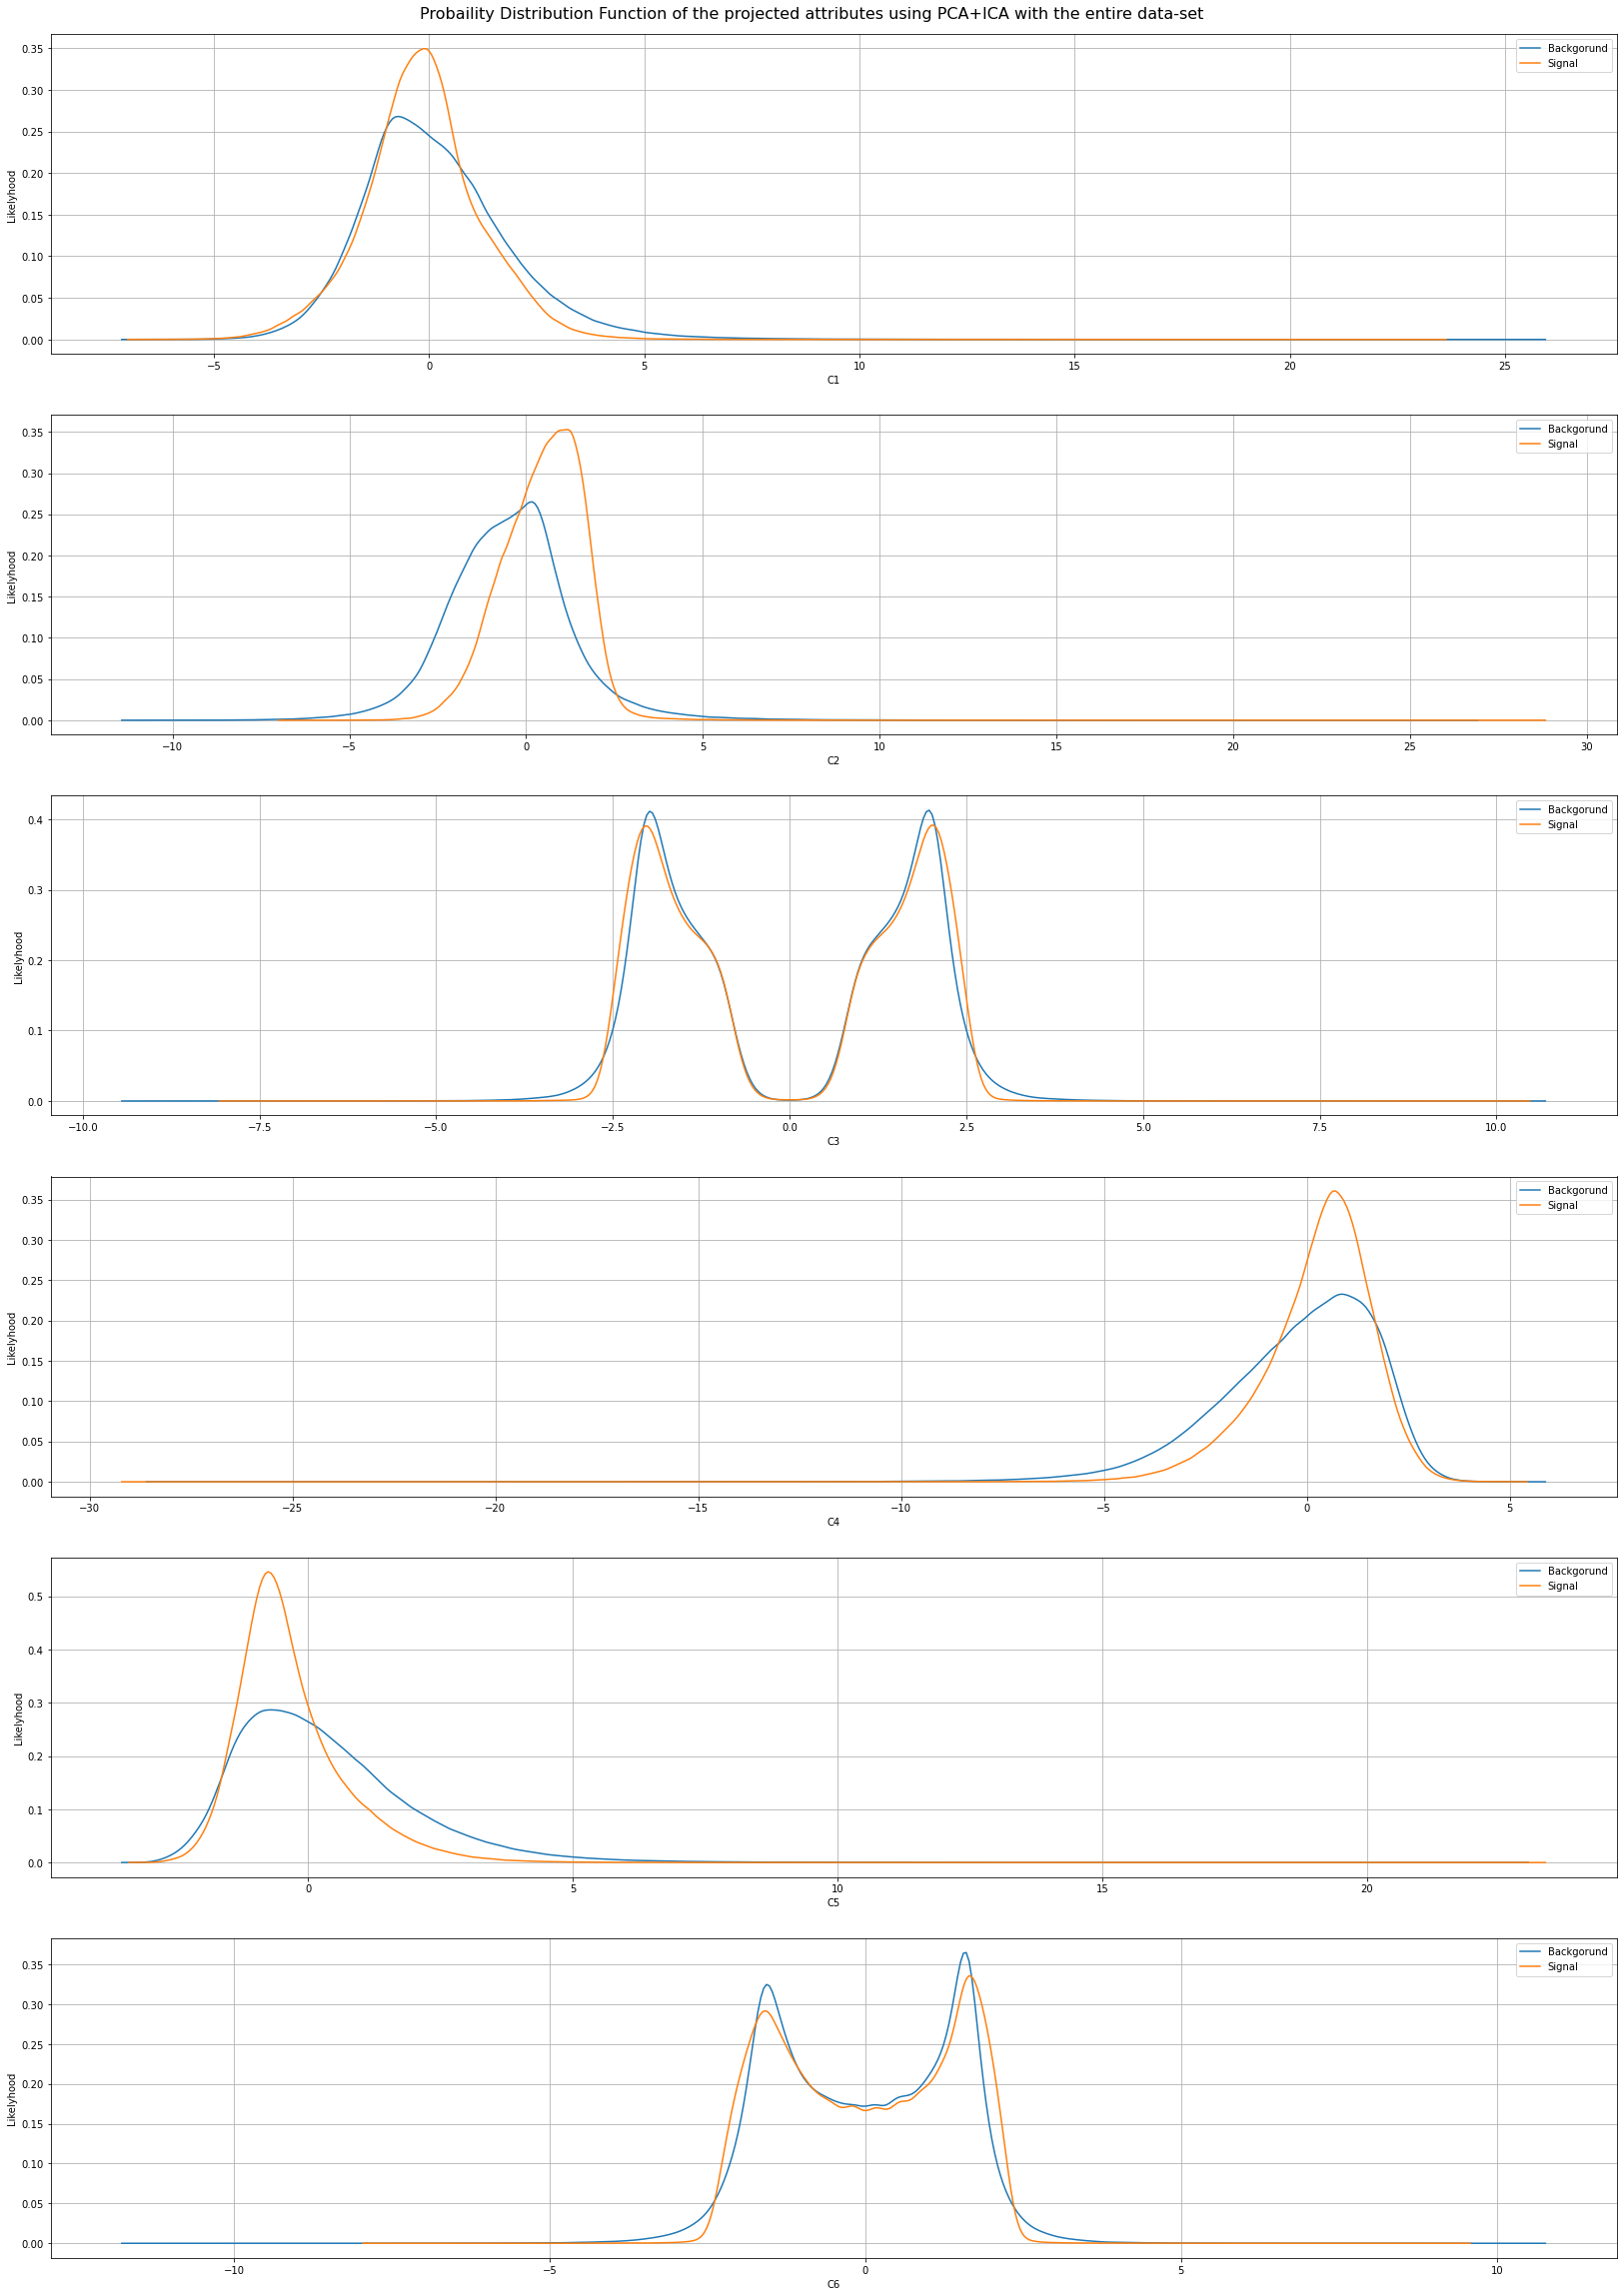

In [55]:
### ploting results

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(6,1)

fig.suptitle("""Probaility Distribution Function of the projected attributes using PCA+ICA with the entire data-set""", fontsize=16)


for i,att in enumerate(Cs):

        # getting attributes values

        att_background = ica_background[:,i]

        att_signal = ica_signal[:,i]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[i].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[i].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[i].legend()
        ax[i].set_xlabel(att)
        ax[i].set_ylabel("Likelyhood")
        ax[i].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/PCA+ICA-PDF-entire-data-set.pdf',format='pdf')

del fig

## Feature engeneering

In [12]:
data.shape

(350000, 21)

In [17]:
from sklearn.metrics.pairwise import polynomial_kernel

pairwise = []

# getting number of divisions

n_elements = len(data)

print('Calculating pairwise metrics...')

for i in range(len(data)):

    line = data[i]

    aux = polynomial_kernel(line.reshape(1,-1),data)

    pairwise.append(aux)

        # updating progress bar

    percent = (i+1)/n_elements * 100

    info = '{:.2f}% - {:d} of {:d}'.format(percent,(i+1),n_elements)

    formated_bar = '-'*int(percent) + ' '*int(100-percent)

    if i < (n_elements):
        sys.stdout.write("\r")

    sys.stdout.write('[%s] %s' % (formated_bar,info))
    sys.stdout.flush()

Calculating pairwise metrics...
[                                                                                                   ] 0.97% - 3383 of 350000

KeyboardInterrupt: 

In [17]:
# perform a polynomial features transform of the dataset

trans = PolynomialFeatures(degree=5,include_bias=False)

features = trans.fit_transform(data[:,18].reshape(-1, 1))


# separating signal from background

features_background = features[:len(background)]

features_signal = features[len(background):]

features_names = ["C^{}".format(int(x)) for x in range(1,len(features[0]))]

In [18]:
features.shape

(1065967, 5)

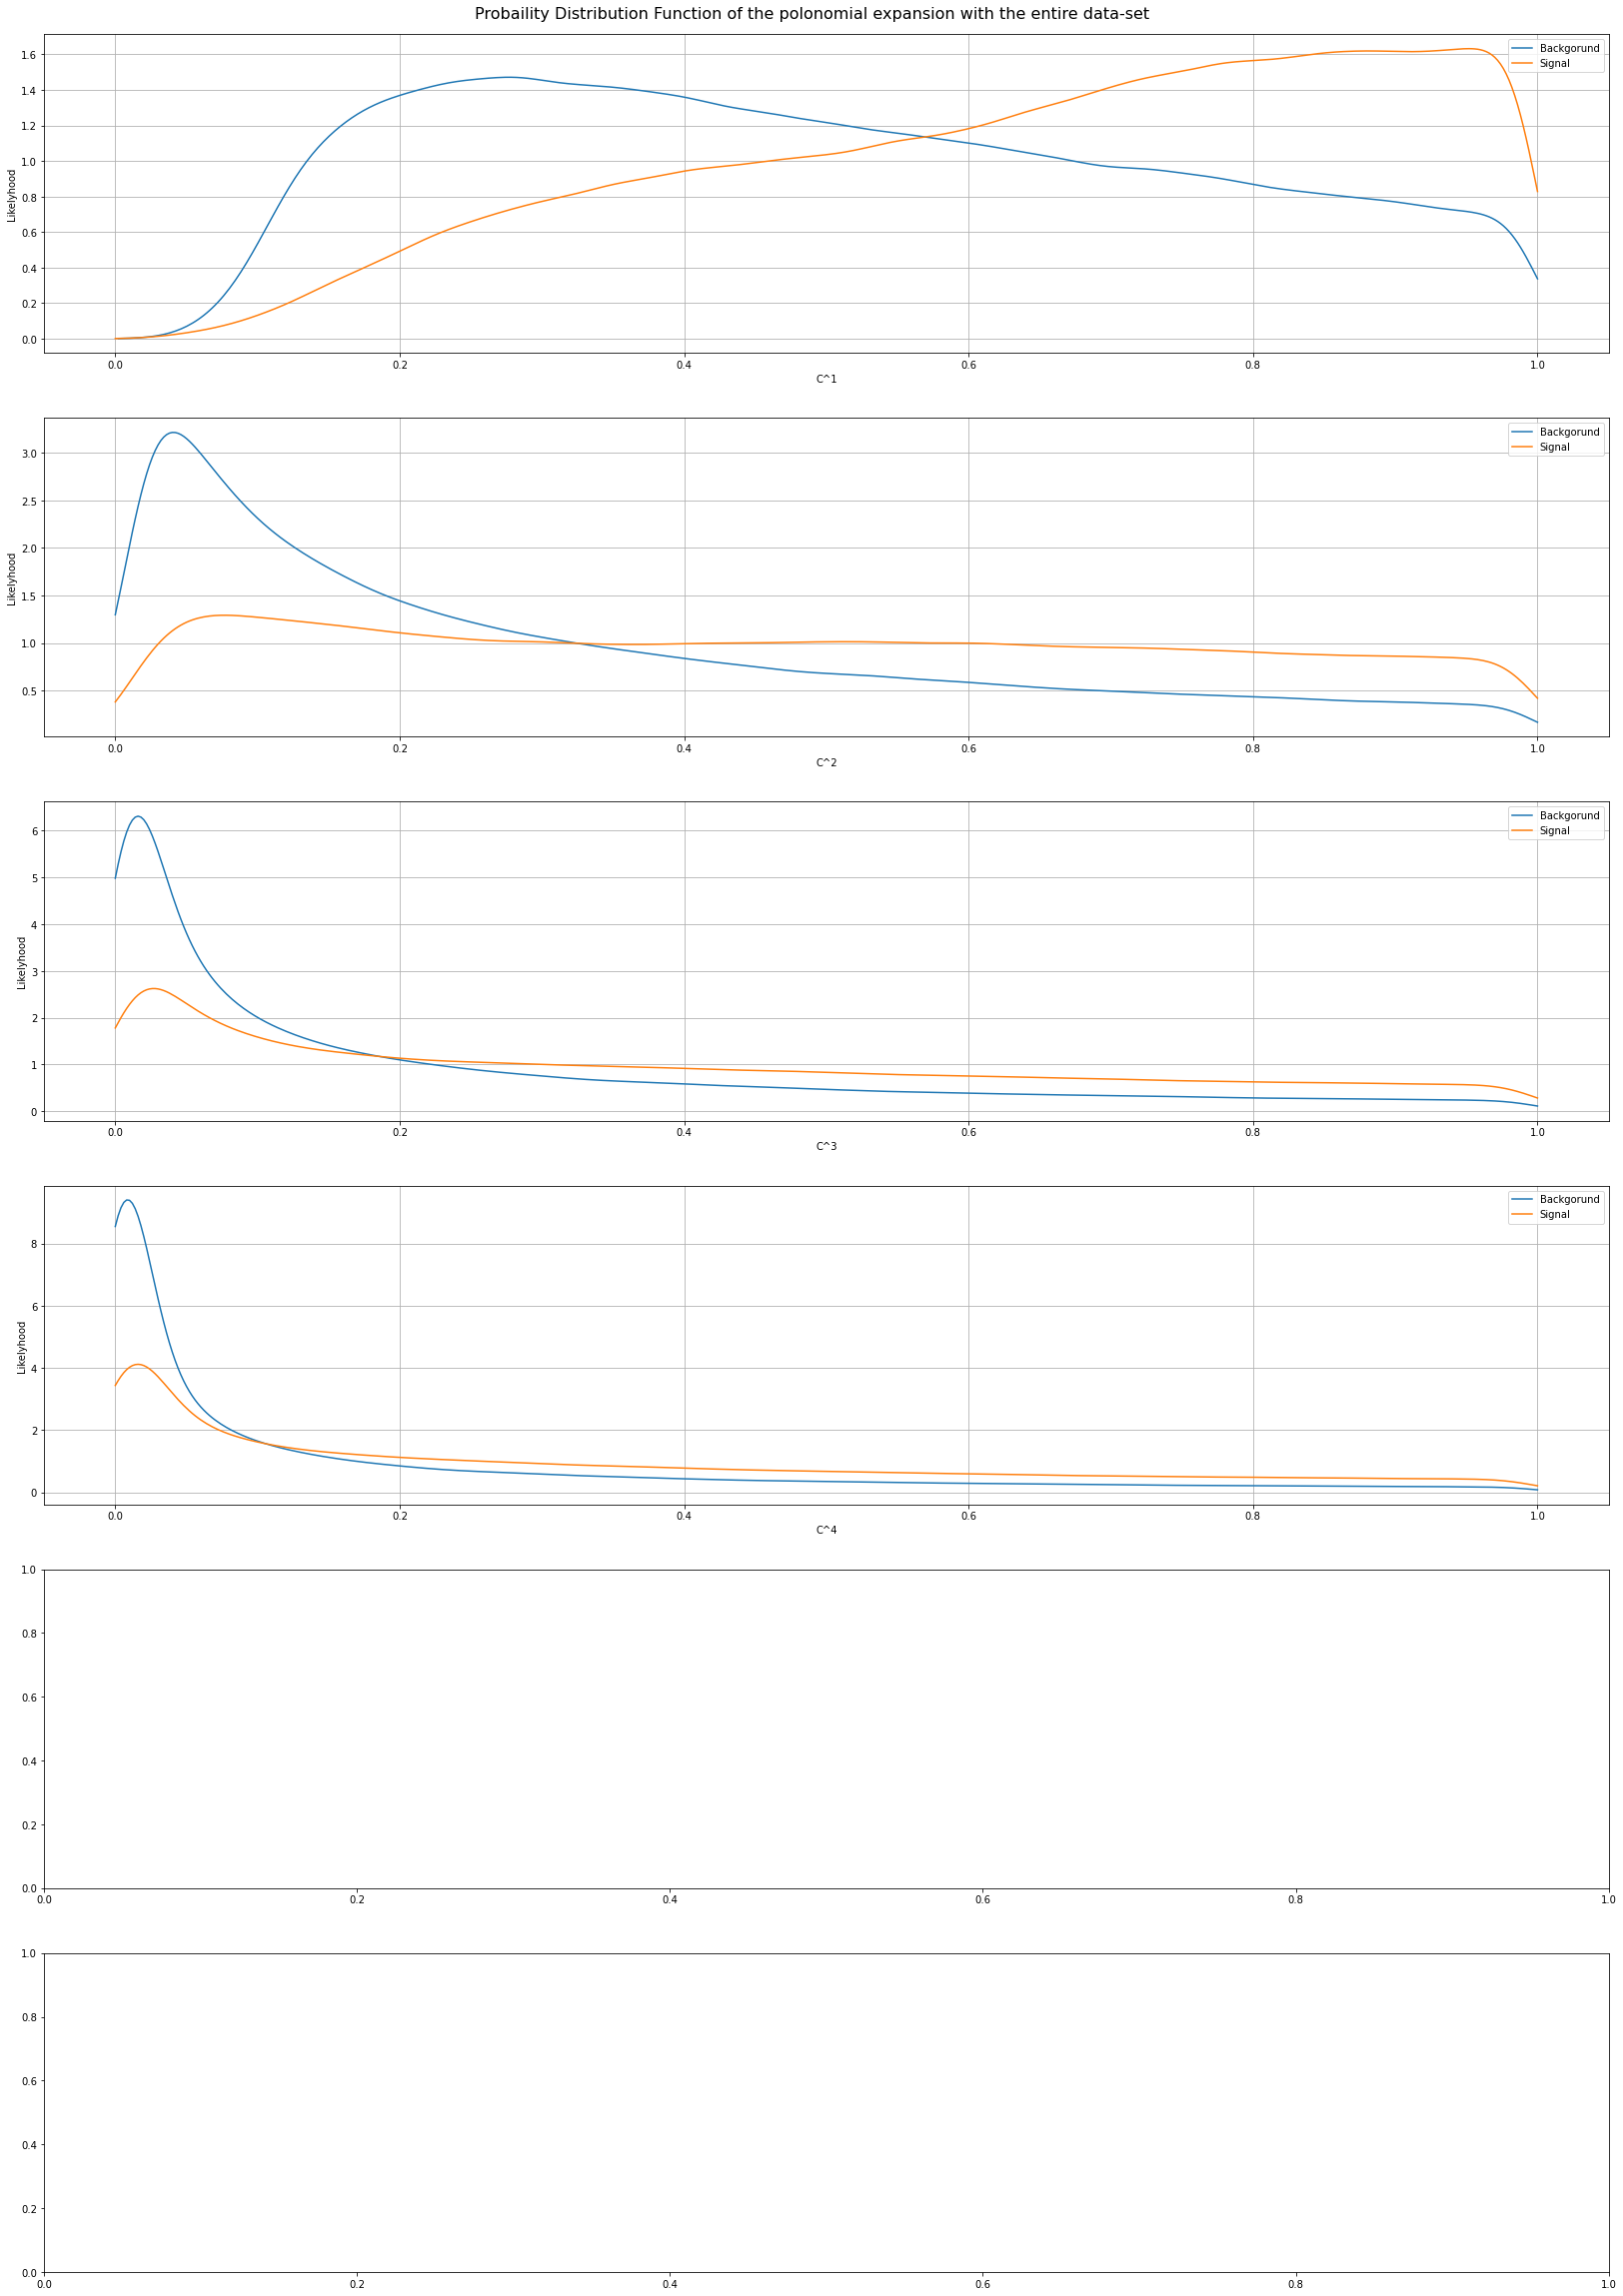

In [19]:
### ploting results

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(6,1)

fig.suptitle("Probaility Distribution Function of the polonomial expansion with the entire data-set", fontsize=16)


for i,att in enumerate(features_names):

        # getting attributes values

        att_background = features_background[:,i]

        att_signal = features_signal[:,i]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # ploting results

        ax[i].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[i].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[i].legend()
        ax[i].set_xlabel(att)
        ax[i].set_ylabel("Likelyhood")
        ax[i].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/Polynomial-PDF-entire-data-set.pdf',format='pdf')

del fig

# Divisions analisys

In [6]:
### creates a dictionary for the divisions

# define the paths into the container
data_path  = 'data/divisions/*'

# create a list of config files

file_list  = glob.glob(data_path)

# creating data divisions dictionary

divisions_dict = {}

# getting number of divisions

n_elements = len(file_list)

print('Reading data divisions...')

for i,file_name in enumerate(file_list):

    with open(file_name, 'rb') as f:
        division = pk.load(f)

    divisions_dict[i] = division

    # updating progress bar

    percent = (i+1)/n_elements * 100

    info = '{:.2f}% - {:d} of {:d}'.format(percent,(i+1),n_elements)

    formated_bar = '-'*int(percent) + ' '*int(100-percent)

    if i < (n_elements):
        sys.stdout.write("\r")

    sys.stdout.write('[%s] %s' % (formated_bar,info))
    sys.stdout.flush()


Reading data divisions...
[----------------------------------------------------------------------------------------------------] 100.00% - 33 of 33

## Orriginal attrributes distribution

In [57]:
### creating likelyhood dictionary

likelyhood_dict = {}

for att in attributes:
    
    likelyhood_dict[att] = {}

    likelyhood_dict[att]['background'] = []

    likelyhood_dict[att]['signal'] = []

# getting number of divisions for progress bar

n_elements = len(divisions_dict.keys()) * len(attributes)

# initializing progress

progress = 0

print('Calculing likelyhood of each attribute 33 times...')

for output in divisions_dict:

    data = divisions_dict[output]['test_df'].values

    y = divisions_dict[output]['test_labels']

    scaler = MinMaxScaler()

    scaler.fit(data)

    data = scaler.transform(data)

    background_div = data[y==0]

    signal_div = data[y==1]

    for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background_div[:,i]

        att_signal = signal_div[:,i]


        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)


        # creating values interval for time optimization

        bg_eval = np.linspace(0,1,num=500)

        sg_eval = np.linspace(0,1,num=500)


        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(bg_eval)


        # saving results in the dictionary

        likelyhood_dict[att]['background'].append(bg_likelyhood)

        likelyhood_dict[att]['signal'].append(sg_likelyhood)
        

        # updating progress bar

        progress += 1

        percent = progress/n_elements * 100

        info = '{:.2f}% - {:d} of {:d}'.format(percent,progress,n_elements)

        formated_bar = '-'*int(percent) + ' '*int(100-percent)

        if i < (n_elements):
            sys.stdout.write("\r")

        sys.stdout.write('[%s] %s' % (formated_bar,info))
        sys.stdout.flush()


Calculing likelyhood of each attribute 33 times...
[----------------------------------------------------------------------------------------------------] 100.00% - 693 of 693

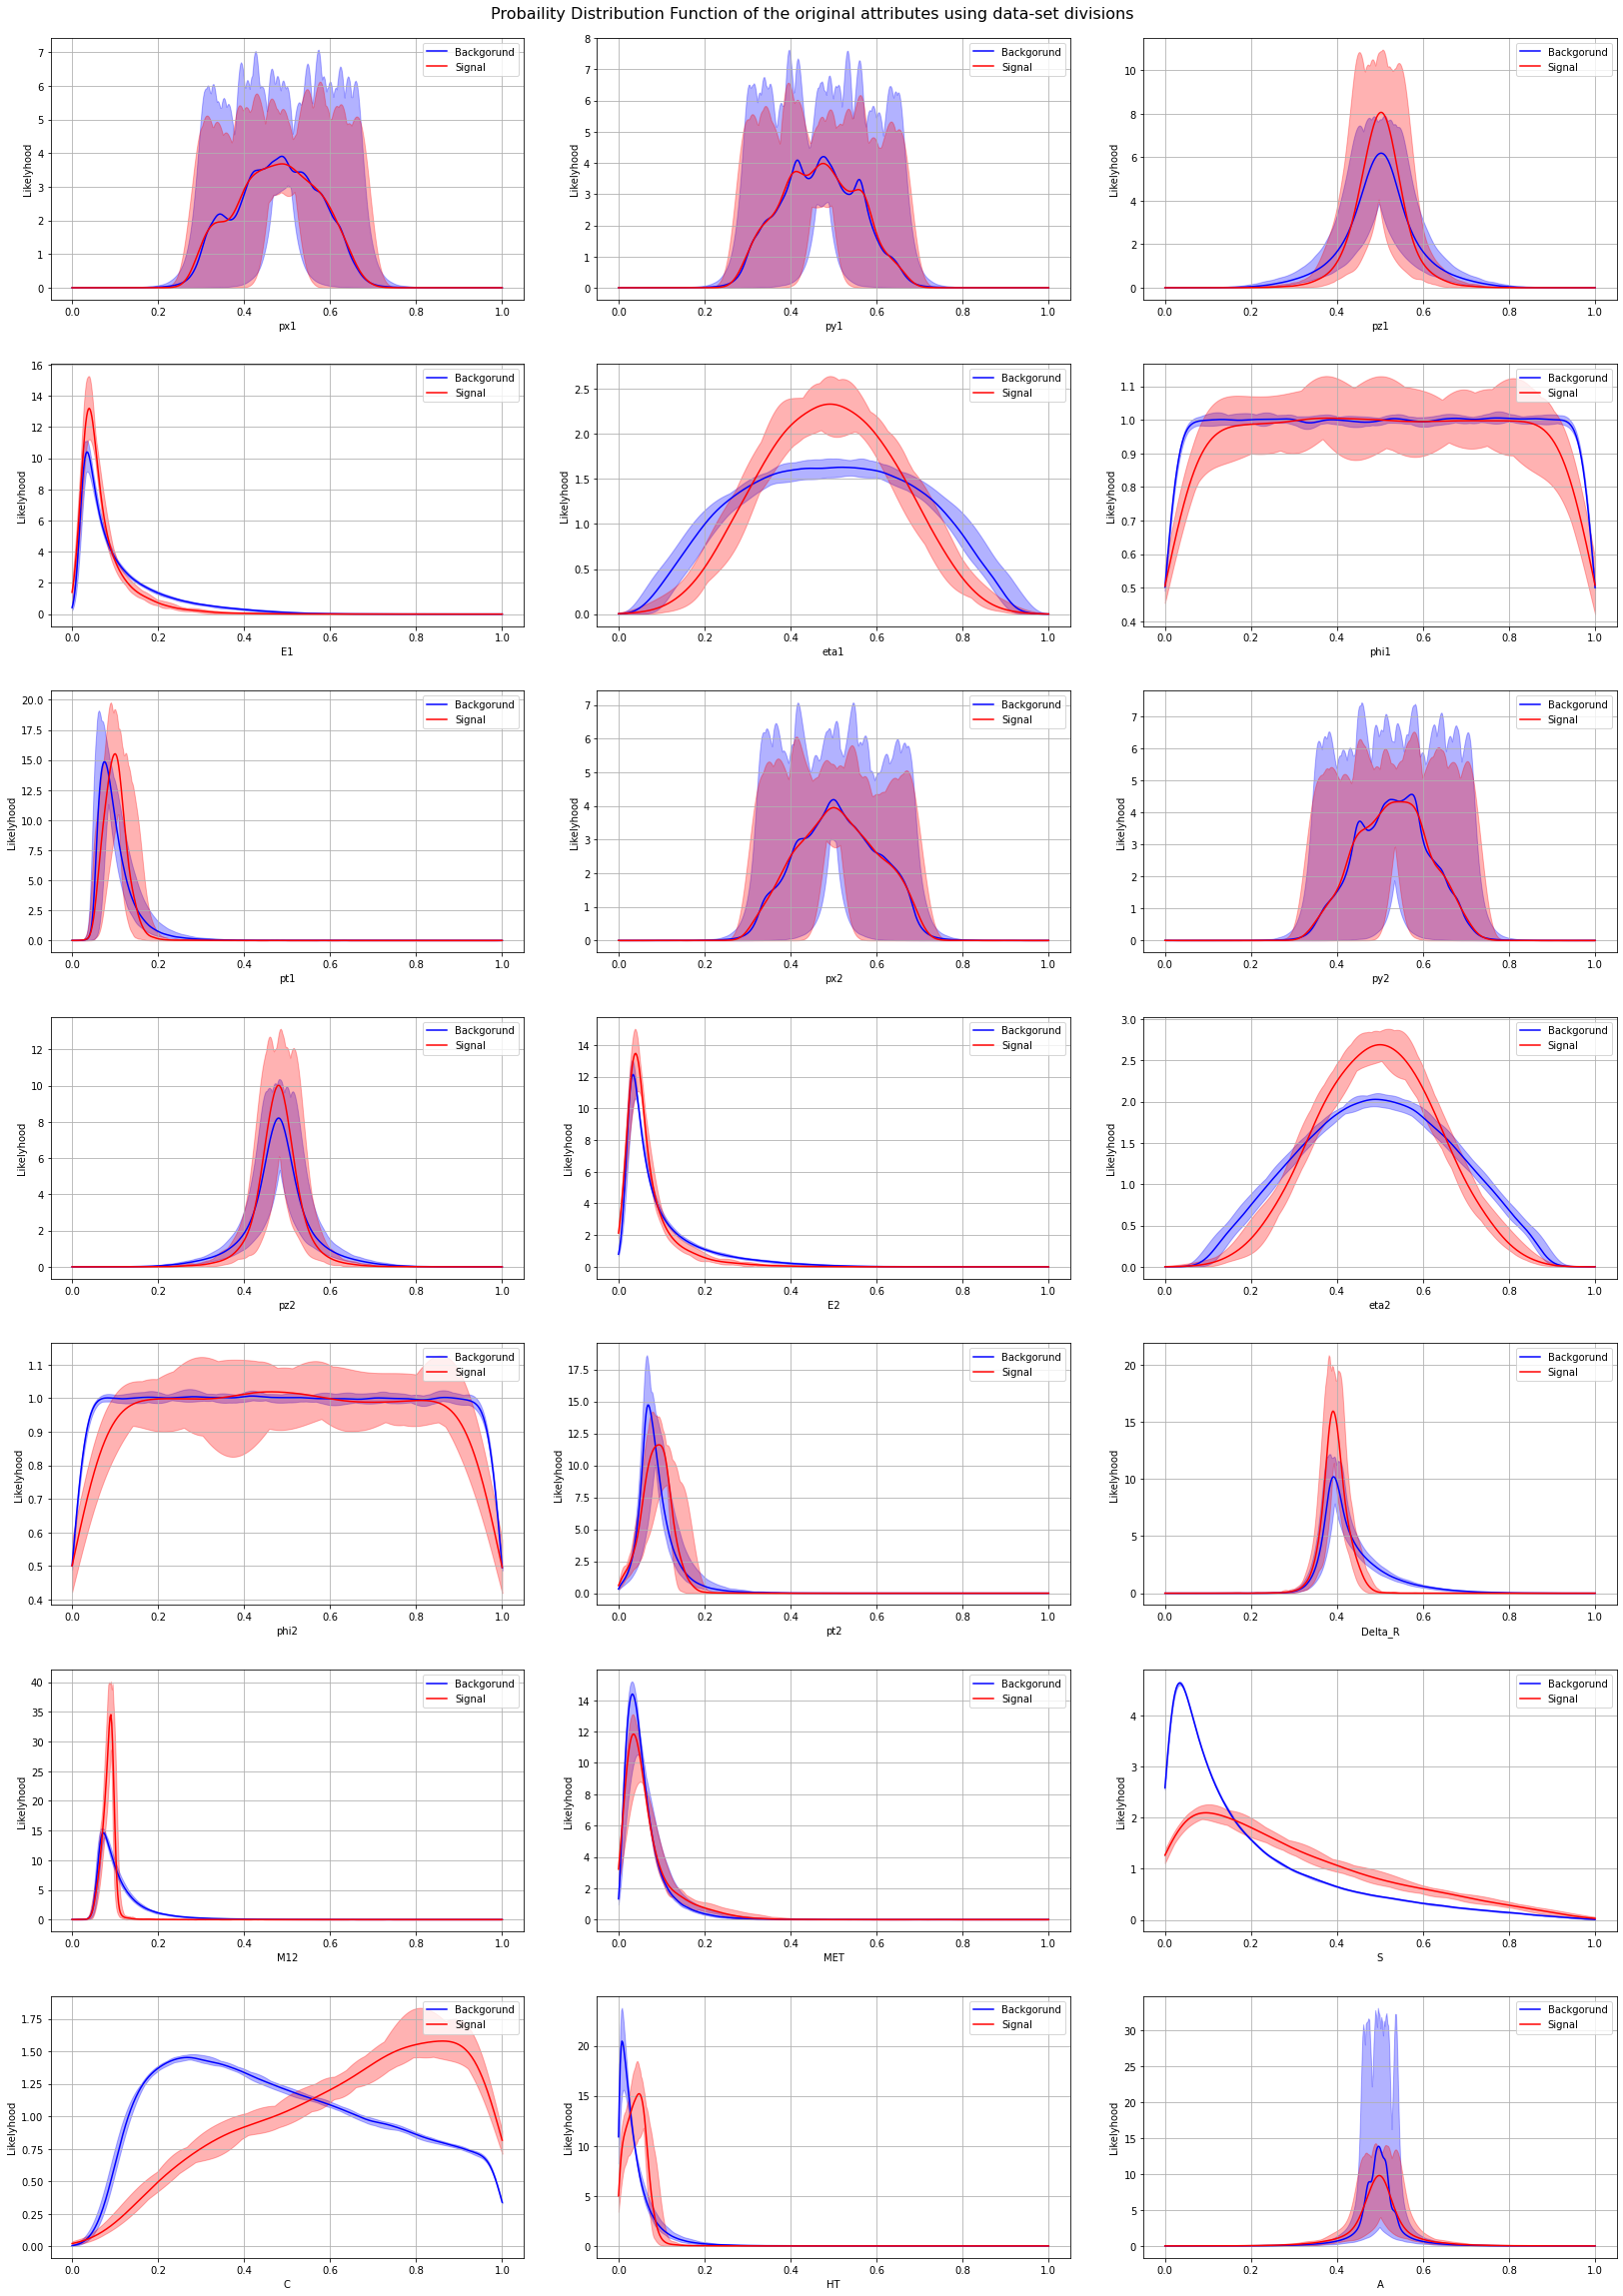

In [58]:
### ploting results

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Probaility Distribution Function of the original attributes using data-set divisions', fontsize=16)

for i,att in enumerate(attributes):

        # computing mean, max and min likelyhood values

        # background

        bg_likelyhood = likelyhood_dict[att]['background']

        bg_likelyhood_mean = np.mean(bg_likelyhood,axis=0)

        bg_likelyhood_min = np.min(bg_likelyhood,axis=0)

        bg_likelyhood_max = np.max(bg_likelyhood,axis=0)

        # signal

        sg_likelyhood = likelyhood_dict[att]['signal']

        sg_likelyhood_mean = np.mean(sg_likelyhood,axis=0)

        sg_likelyhood_min = np.min(sg_likelyhood,axis=0)

        sg_likelyhood_max = np.max(sg_likelyhood,axis=0)


        # creating values interval for time optimization

        bg_eval = np.linspace(0,1,num=500)

        sg_eval = np.linspace(0,1,num=500)


        # defining plot location

        line = int(i//3)

        col = int(i%3)


        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood_mean, 
                ms=3.5, linestyle='-', color = 'b',
                label= 'Backgorund')

        ax[line,col].fill_between(bg_eval,
                                y1=bg_likelyhood_min,
                                y2=bg_likelyhood_max,
                                linestyle='-', color = 'b',
                                alpha = 0.3)

        ax[line,col].plot(sg_eval, sg_likelyhood_mean, 
                ms=3.5, linestyle='-', color = 'r',
                label= 'Signal')

        ax[line,col].fill_between(sg_eval,
                                y1=sg_likelyhood_min,
                                y2=sg_likelyhood_max,
                                linestyle='-', color = 'r',
                                alpha = 0.3)

        ax[line,col].legend()
        ax[line,col].set_xlabel(att)
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-PDF-divisions.pdf',format='pdf')

del fig

## PCA

In [10]:
N_PCs = 6

In [11]:
### Calculate PCA variance

variance_list = []

pca_dict = {}

for output in divisions_dict:

    data = divisions_dict[output]['train_df'].values

    # normalizing data

    scaler = MinMaxScaler()

    scaler.fit(data)

    data = scaler.transform(data)

    # standardizing

    scaler = StandardScaler().fit(data)

    features_padronizadas = scaler.transform(data)

    # fitting model

    pca_2 = PCA(n_components = N_PCs)
    pca_2.fit(features_padronizadas)

    # saving model for next step

    pca_dict[output] = pca

    # maintained variance calculation

    variancia_percentual_pca = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)

    # appending variance

    variance_list.append(variancia_percentual_pca.sum())

print('Variation maintained: {:.2f} +/- {:.2f}'.format(np.mean(variance_list),np.std(variance_list)))
print('                  ')

NameError: name 'pca' is not defined

In [60]:
### creating likelyhood dictionary

likelyhood_dict = {}

for att in PCs:
    
    likelyhood_dict[att] = {}

    likelyhood_dict[att]['background'] = []

    likelyhood_dict[att]['signal'] = []

# getting number of divisions for progress bar

n_elements = len(divisions_dict.keys()) * len(PCs)

# initializing progress

progress = 0

print('Calculing likelyhood of each attribute 33 times...')

for output in divisions_dict:

    data = divisions_dict[output]['test_df'].values

    y = divisions_dict[output]['test_labels']

    # normalizing data

    scaler = MinMaxScaler()

    scaler.fit(data)

    data = scaler.transform(data)

    # standardizing

    scaler = StandardScaler().fit(data)

    features_padronizadas = scaler.transform(data)

    # projecting with PCA

    proj_data = pca_dict[output].transform(features_padronizadas)

    # separating signal from background

    background_div = proj_data[y==0]

    signal_div = proj_data[y==1]

    for i,att in enumerate(PCs):

        # getting attributes values

        att_background = background_div[:,i]

        att_signal = signal_div[:,i]


        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)


        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)


        # saving results in the dictionary

        likelyhood_dict[att]['background'].append(bg_likelyhood)

        likelyhood_dict[att]['signal'].append(sg_likelyhood)

        likelyhood_dict[att]['bg_eval'] = bg_eval

        likelyhood_dict[att]['sg_eval'] = sg_eval
        

        # updating progress bar

        progress += 1

        percent = progress/n_elements * 100

        info = '{:.2f}% - {:d} of {:d}'.format(percent,progress,n_elements)

        formated_bar = '-'*int(percent) + ' '*int(100-percent)

        if i < (n_elements):
            sys.stdout.write("\r")

        sys.stdout.write('[%s] %s' % (formated_bar,info))
        sys.stdout.flush()

Calculing likelyhood of each attribute 33 times...
[----------------------------------------------------------------------------------------------------] 100.00% - 198 of 198

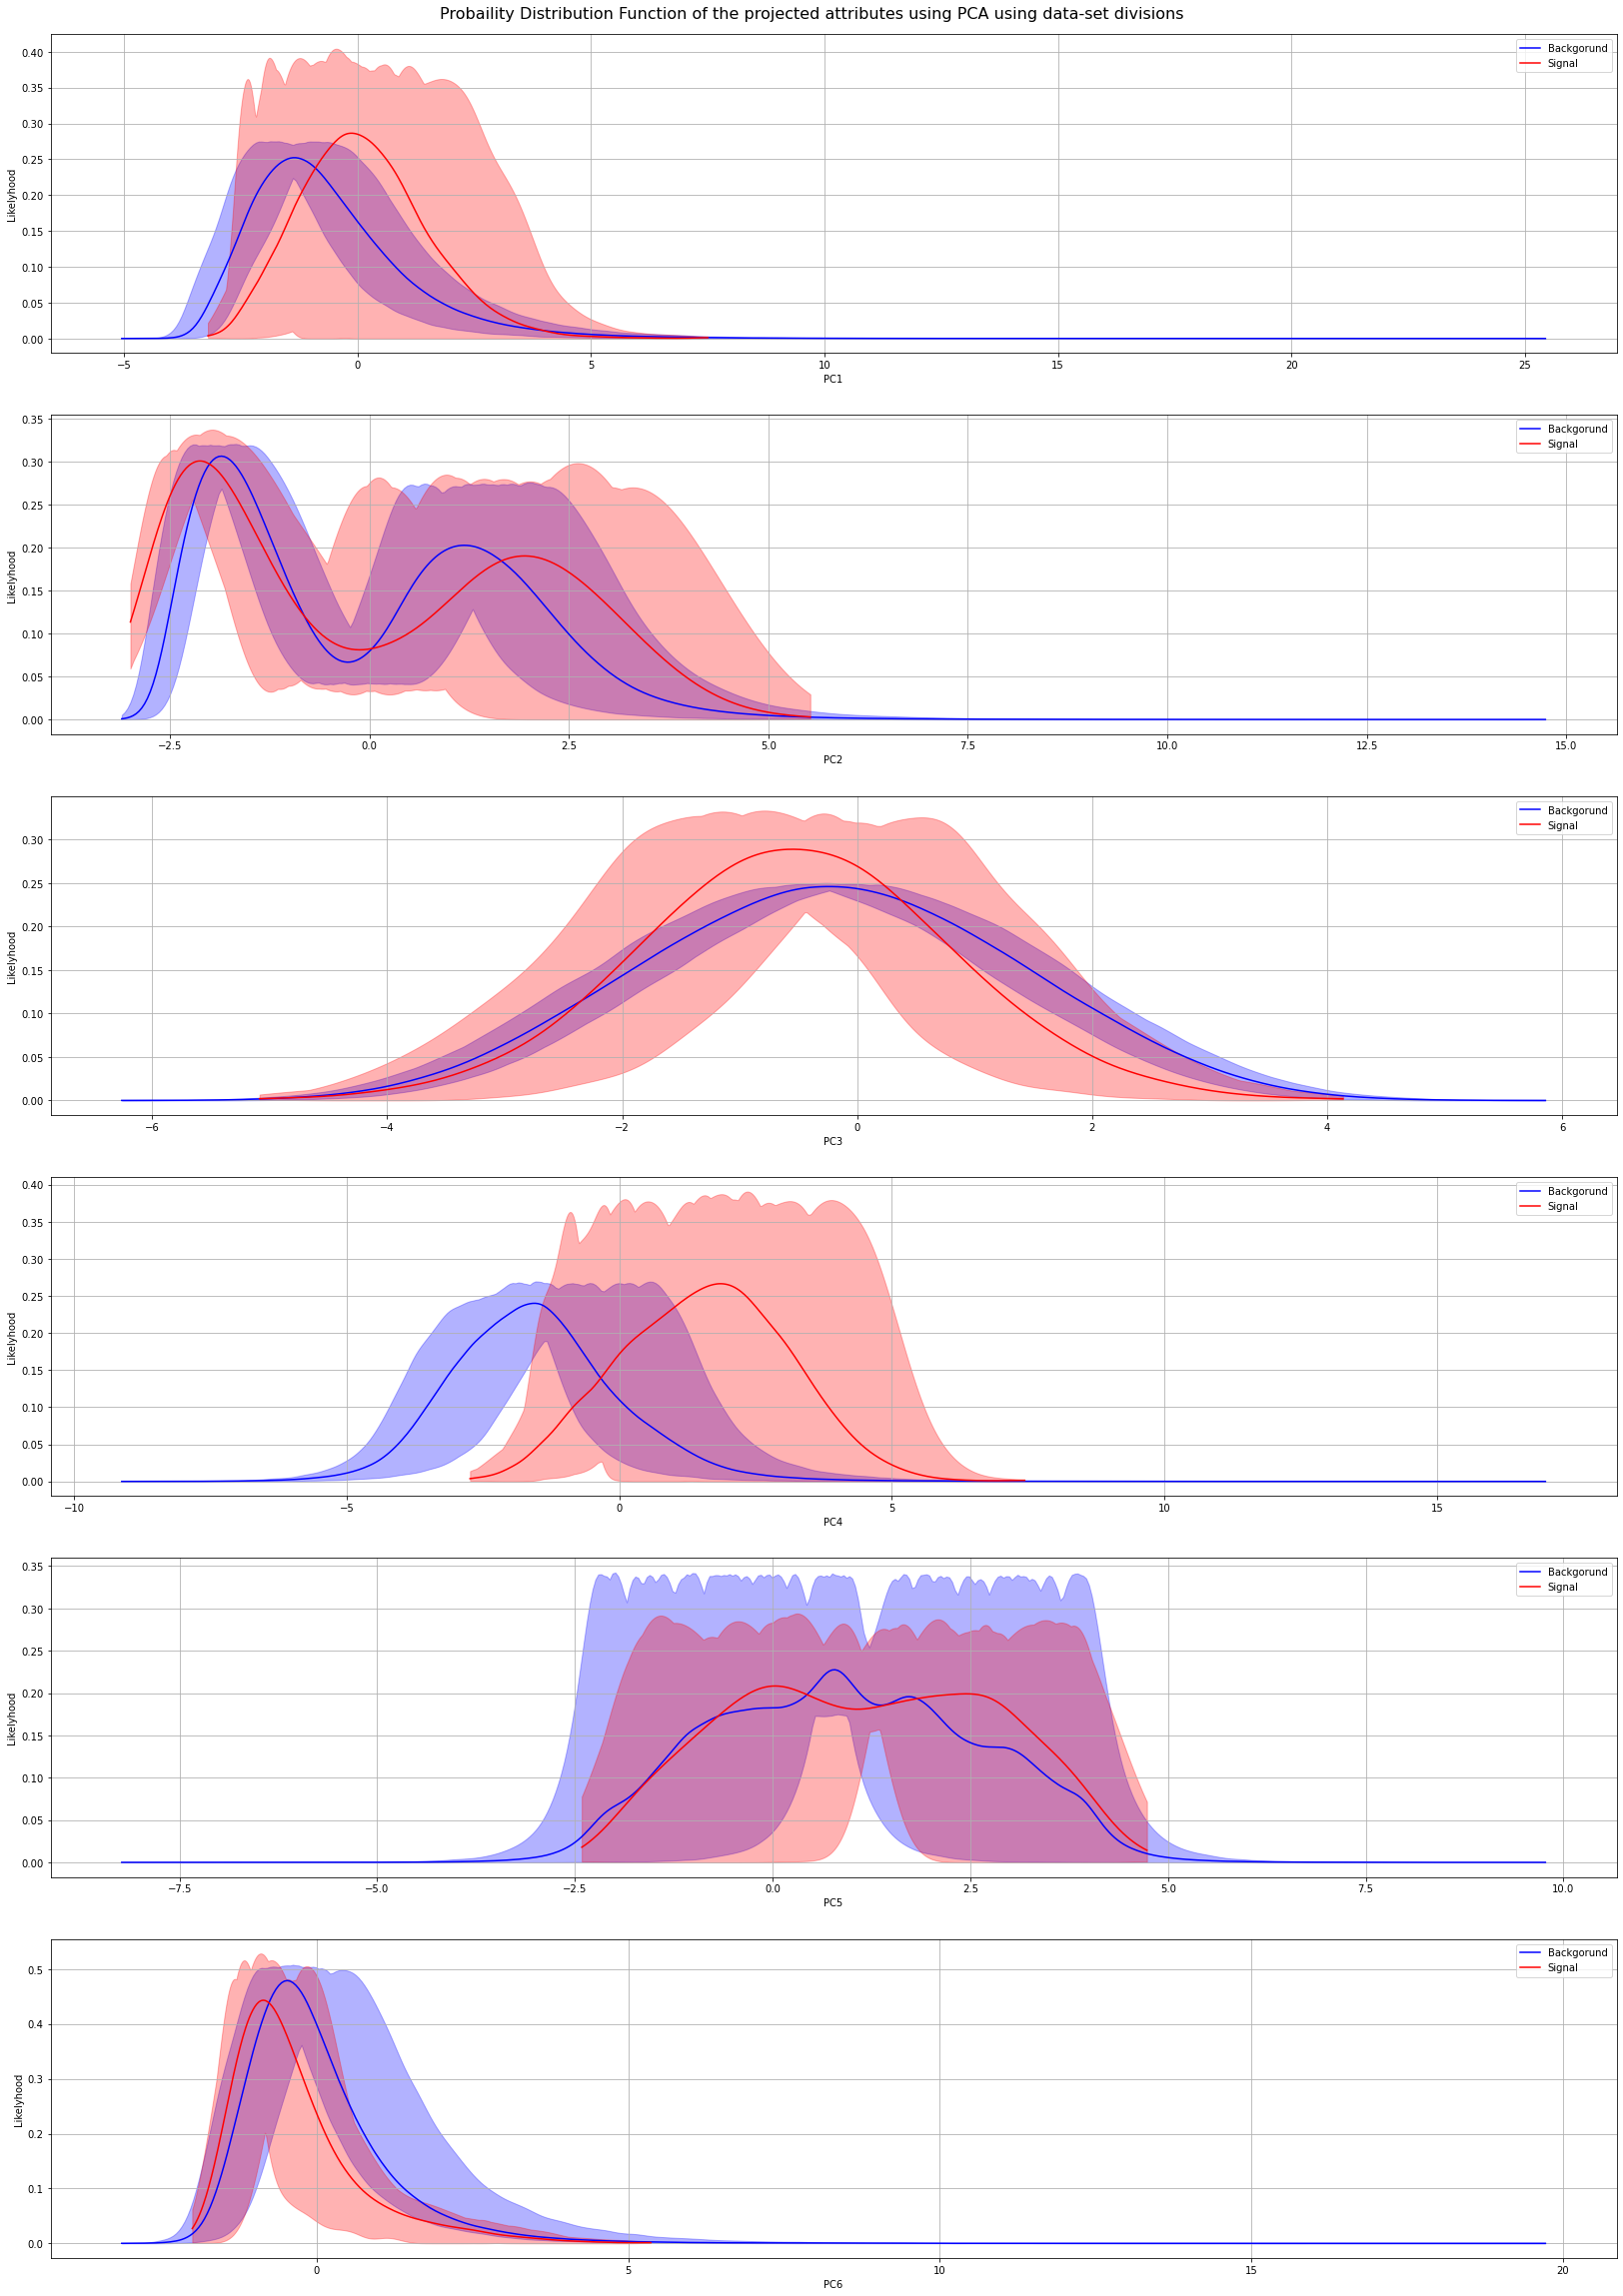

In [61]:
### ploting results

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(6,1)

fig.suptitle("Probaility Distribution Function of the projected attributes using PCA using data-set divisions", fontsize=16)

for i,att in enumerate(PCs):

        # computing mean, max and min likelyhood values

        # background

        bg_likelyhood = likelyhood_dict[att]['background']

        bg_likelyhood_mean = np.mean(bg_likelyhood,axis=0)

        bg_likelyhood_min = np.min(bg_likelyhood,axis=0)

        bg_likelyhood_max = np.max(bg_likelyhood,axis=0)

        # signal

        sg_likelyhood = likelyhood_dict[att]['signal']

        sg_likelyhood_mean = np.mean(sg_likelyhood,axis=0)

        sg_likelyhood_min = np.min(sg_likelyhood,axis=0)

        sg_likelyhood_max = np.max(sg_likelyhood,axis=0)

        # getting values interval for time optimization

        bg_eval = likelyhood_dict[att]['bg_eval']

        sg_eval = likelyhood_dict[att]['sg_eval']


        # ploting results

        ax[i].plot(bg_eval, bg_likelyhood_mean, 
                ms=3.5, linestyle='-', color = 'b',
                label= 'Backgorund')

        ax[i].fill_between(bg_eval,
                                y1=bg_likelyhood_min,
                                y2=bg_likelyhood_max,
                                linestyle='-', color = 'b',
                                alpha = 0.3)

        ax[i].plot(sg_eval, sg_likelyhood_mean, 
                ms=3.5, linestyle='-', color = 'r',
                label= 'Signal')

        ax[i].fill_between(sg_eval,
                                y1=sg_likelyhood_min,
                                y2=sg_likelyhood_max,
                                linestyle='-', color = 'r',
                                alpha = 0.3)

        ax[i].legend()
        ax[i].set_xlabel(att)
        ax[i].set_ylabel("Likelyhood")
        ax[i].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-PCA-divisions.pdf',format='pdf')

del fig

## PCA+ICA

In [62]:
### creating likelyhood dictionary

ica = FastICA( algorithm='parallel',
                whiten=False,
                max_iter=400
            )

likelyhood_dict = {}


for att in Cs:
    
    likelyhood_dict[att] = {}

    likelyhood_dict[att]['background'] = []

    likelyhood_dict[att]['signal'] = []

# getting number of divisions for progress bar

n_elements = len(divisions_dict.keys()) * len(PCs)

# initializing progress

progress = 0

print('Calculing likelyhood of each attribute 33 times...')

for output in divisions_dict:

    data = divisions_dict[output]['test_df'].values

    y = divisions_dict[output]['test_labels']

    # normalizing data

    scaler = MinMaxScaler()

    scaler.fit(data)

    data = scaler.transform(data)

    # standardizing

    scaler = StandardScaler().fit(data)

    features_padronizadas = scaler.transform(data)

    # projecting with PCA

    proj_data = pca_dict[output].transform(features_padronizadas)

    # projecting data with ICA

    ica_data = ica.fit(proj_data).transform(proj_data)


    # separating signal from background

    background_div = ica_data[y==0]

    signal_div = ica_data[y==1]

    for i,att in enumerate(Cs):

        # getting attributes values

        att_background = background_div[:,i]

        att_signal = signal_div[:,i]


        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)


        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)


        # saving results in the dictionary

        likelyhood_dict[att]['background'].append(bg_likelyhood)

        likelyhood_dict[att]['signal'].append(sg_likelyhood)

        likelyhood_dict[att]['bg_eval'] = bg_eval

        likelyhood_dict[att]['sg_eval'] = sg_eval
        

        # updating progress bar

        progress += 1

        percent = progress/n_elements * 100

        info = '{:.2f}% - {:d} of {:d}'.format(percent,progress,n_elements)

        formated_bar = '-'*int(percent) + ' '*int(100-percent)

        if i < (n_elements):
            sys.stdout.write("\r")

        sys.stdout.write('[%s] %s' % (formated_bar,info))
        sys.stdout.flush()

Calculing likelyhood of each attribute 33 times...


/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---                                                                                                ] 3.03% - 6 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------                                                                                             ] 6.06% - 12 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------                                                                                       ] 12.12% - 24 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------                                                                                 ] 18.18% - 36 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------                                                                              ] 21.21% - 42 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------                                                                           ] 24.24% - 48 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------                                                                     ] 30.30% - 60 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------                                                                  ] 33.33% - 66 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------                                                               ] 36.36% - 72 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------                                                            ] 39.39% - 78 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------                                                         ] 42.42% - 84 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------------                                                      ] 45.45% - 90 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------                                                   ] 48.48% - 96 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------------------                                                ] 51.52% - 102 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------                                             ] 54.55% - 108 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------------                                       ] 60.61% - 120 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------------------------------                                    ] 63.64% - 126 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------------------                                 ] 66.67% - 132 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------------------------------------                              ] 69.70% - 138 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------------------------                           ] 72.73% - 144 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------------------------------------------                        ] 75.76% - 150 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------------------------------                     ] 78.79% - 156 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------------------------------------------------                  ] 81.82% - 162 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------------------------------------               ] 84.85% - 168 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[---------------------------------------------------------------------------------------            ] 87.88% - 174 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------------------------------------------         ] 90.91% - 180 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[------------------------------------------------------------------------------------------------   ] 96.97% - 192 of 198

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[----------------------------------------------------------------------------------------------------] 100.00% - 198 of 198

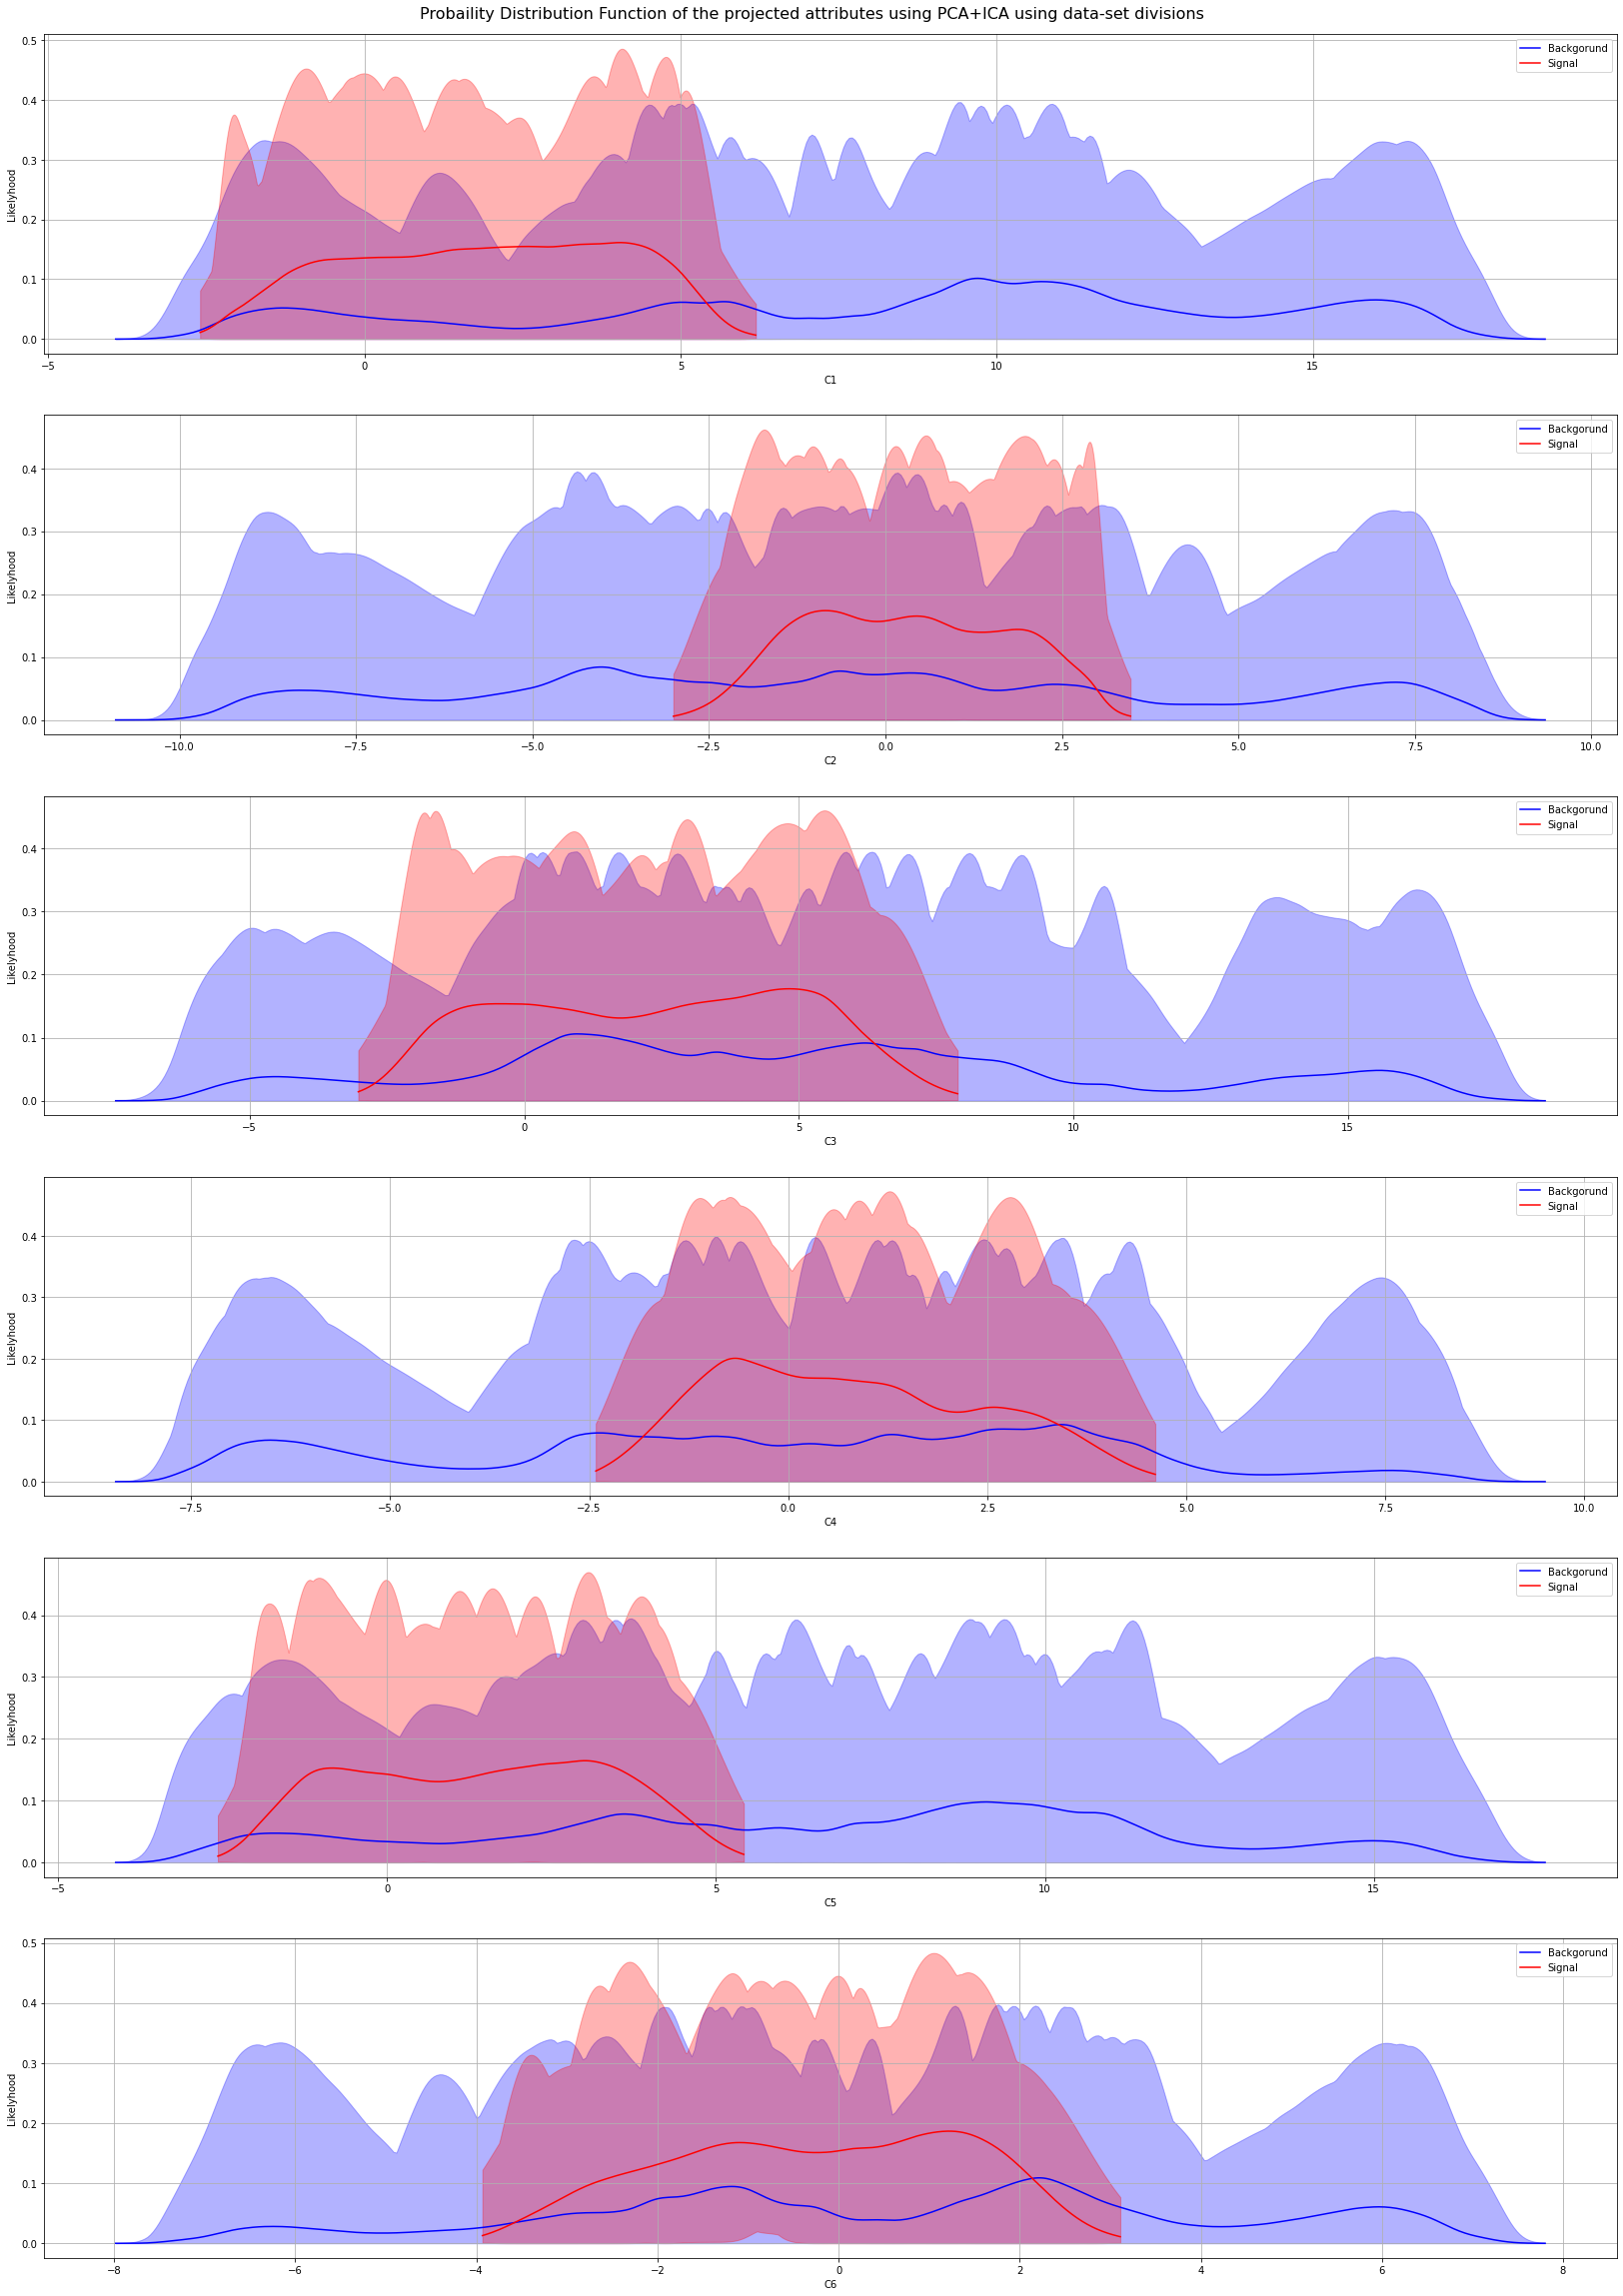

In [63]:
### ploting results

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(6,1)

fig.suptitle("Probaility Distribution Function of the projected attributes using PCA+ICA using data-set divisions", fontsize=16)

for i,att in enumerate(Cs):

        # computing mean, max and min likelyhood values

        # background

        bg_likelyhood = likelyhood_dict[att]['background']

        bg_likelyhood_mean = np.mean(bg_likelyhood,axis=0)

        bg_likelyhood_min = np.min(bg_likelyhood,axis=0)

        bg_likelyhood_max = np.max(bg_likelyhood,axis=0)

        # signal

        sg_likelyhood = likelyhood_dict[att]['signal']

        sg_likelyhood_mean = np.mean(sg_likelyhood,axis=0)

        sg_likelyhood_min = np.min(sg_likelyhood,axis=0)

        sg_likelyhood_max = np.max(sg_likelyhood,axis=0)

        # getting values interval for time optimization

        bg_eval = likelyhood_dict[att]['bg_eval']

        sg_eval = likelyhood_dict[att]['sg_eval']


        # ploting results

        ax[i].plot(bg_eval, bg_likelyhood_mean, 
                ms=3.5, linestyle='-', color = 'b',
                label= 'Backgorund')

        ax[i].fill_between(bg_eval,
                                y1=bg_likelyhood_min,
                                y2=bg_likelyhood_max,
                                linestyle='-', color = 'b',
                                alpha = 0.3)

        ax[i].plot(sg_eval, sg_likelyhood_mean, 
                ms=3.5, linestyle='-', color = 'r',
                label= 'Signal')

        ax[i].fill_between(sg_eval,
                                y1=sg_likelyhood_min,
                                y2=sg_likelyhood_max,
                                linestyle='-', color = 'r',
                                alpha = 0.3)

        ax[i].legend()
        ax[i].set_xlabel(att)
        ax[i].set_ylabel("Likelyhood")
        ax[i].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-PCA+ICA-divisions.pdf',format='pdf')

del fig